In [213]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import matplotlib as mpl
import scipy.stats as stats 

from IPython.display import set_matplotlib_formats

mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus =True)
set_matplotlib_formats('retina')
pd.options.display.max_columns = 100
pd.options.display.max_rows = 1000
import warnings 
warnings.filterwarnings('ignore')


# 학습/검증 데이터 분할 / 매개변수 튜닝 / 교차검증 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
# 평가 
from sklearn.metrics import classification_report
from IPython.display import Image
import pandas as pd
import numpy as np
import pydotplus

import os
os.environ['PATH'] += os.pathsep + 'C:/Program Files/Graphviz/bin'

## 타이타닉 데이터 분석해보기

- PassengerId : 각 승객의 고유 번호

- Survived : 생존 여부(종속 변수)

  - 0 = 사망
  - 1 = 생존
- Pclass : 객실 등급 - 승객의 사회적, 경제적 지위

   - 1st = Upper
   - 2nd = Middle
   - 3rd = Lower
- Name : 이름

- Sex : 성별

- Age : 나이

- SibSp : 동반한 Sibling(형제자매)와 Spouse(배우자)의 수

- Parch : 동반한 Parent(부모) Child(자식)의 수

- Ticket : 티켓의 고유넘버

- Fare : 티켓의 요금

- Cabin : 객실 번호

- Embarked : 승선한 항

    - C = Cherbour
    - Q = Queenstown
    - S = Southampton

In [214]:
titanic_train = pd.read_csv('../data/titanic/train.csv')

In [215]:
titanic_train.info()
print(titanic_train.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
(891, 12)


In [216]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [217]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [218]:
titanic_train.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [219]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [220]:
titanic_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [221]:
titanic_train[titanic_train['Age']<1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S


In [222]:
titanic_train[titanic_train['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [223]:
titanic_train.isnull().sum()/len(titanic_train)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [224]:
!pip install missingno

<AxesSubplot:>

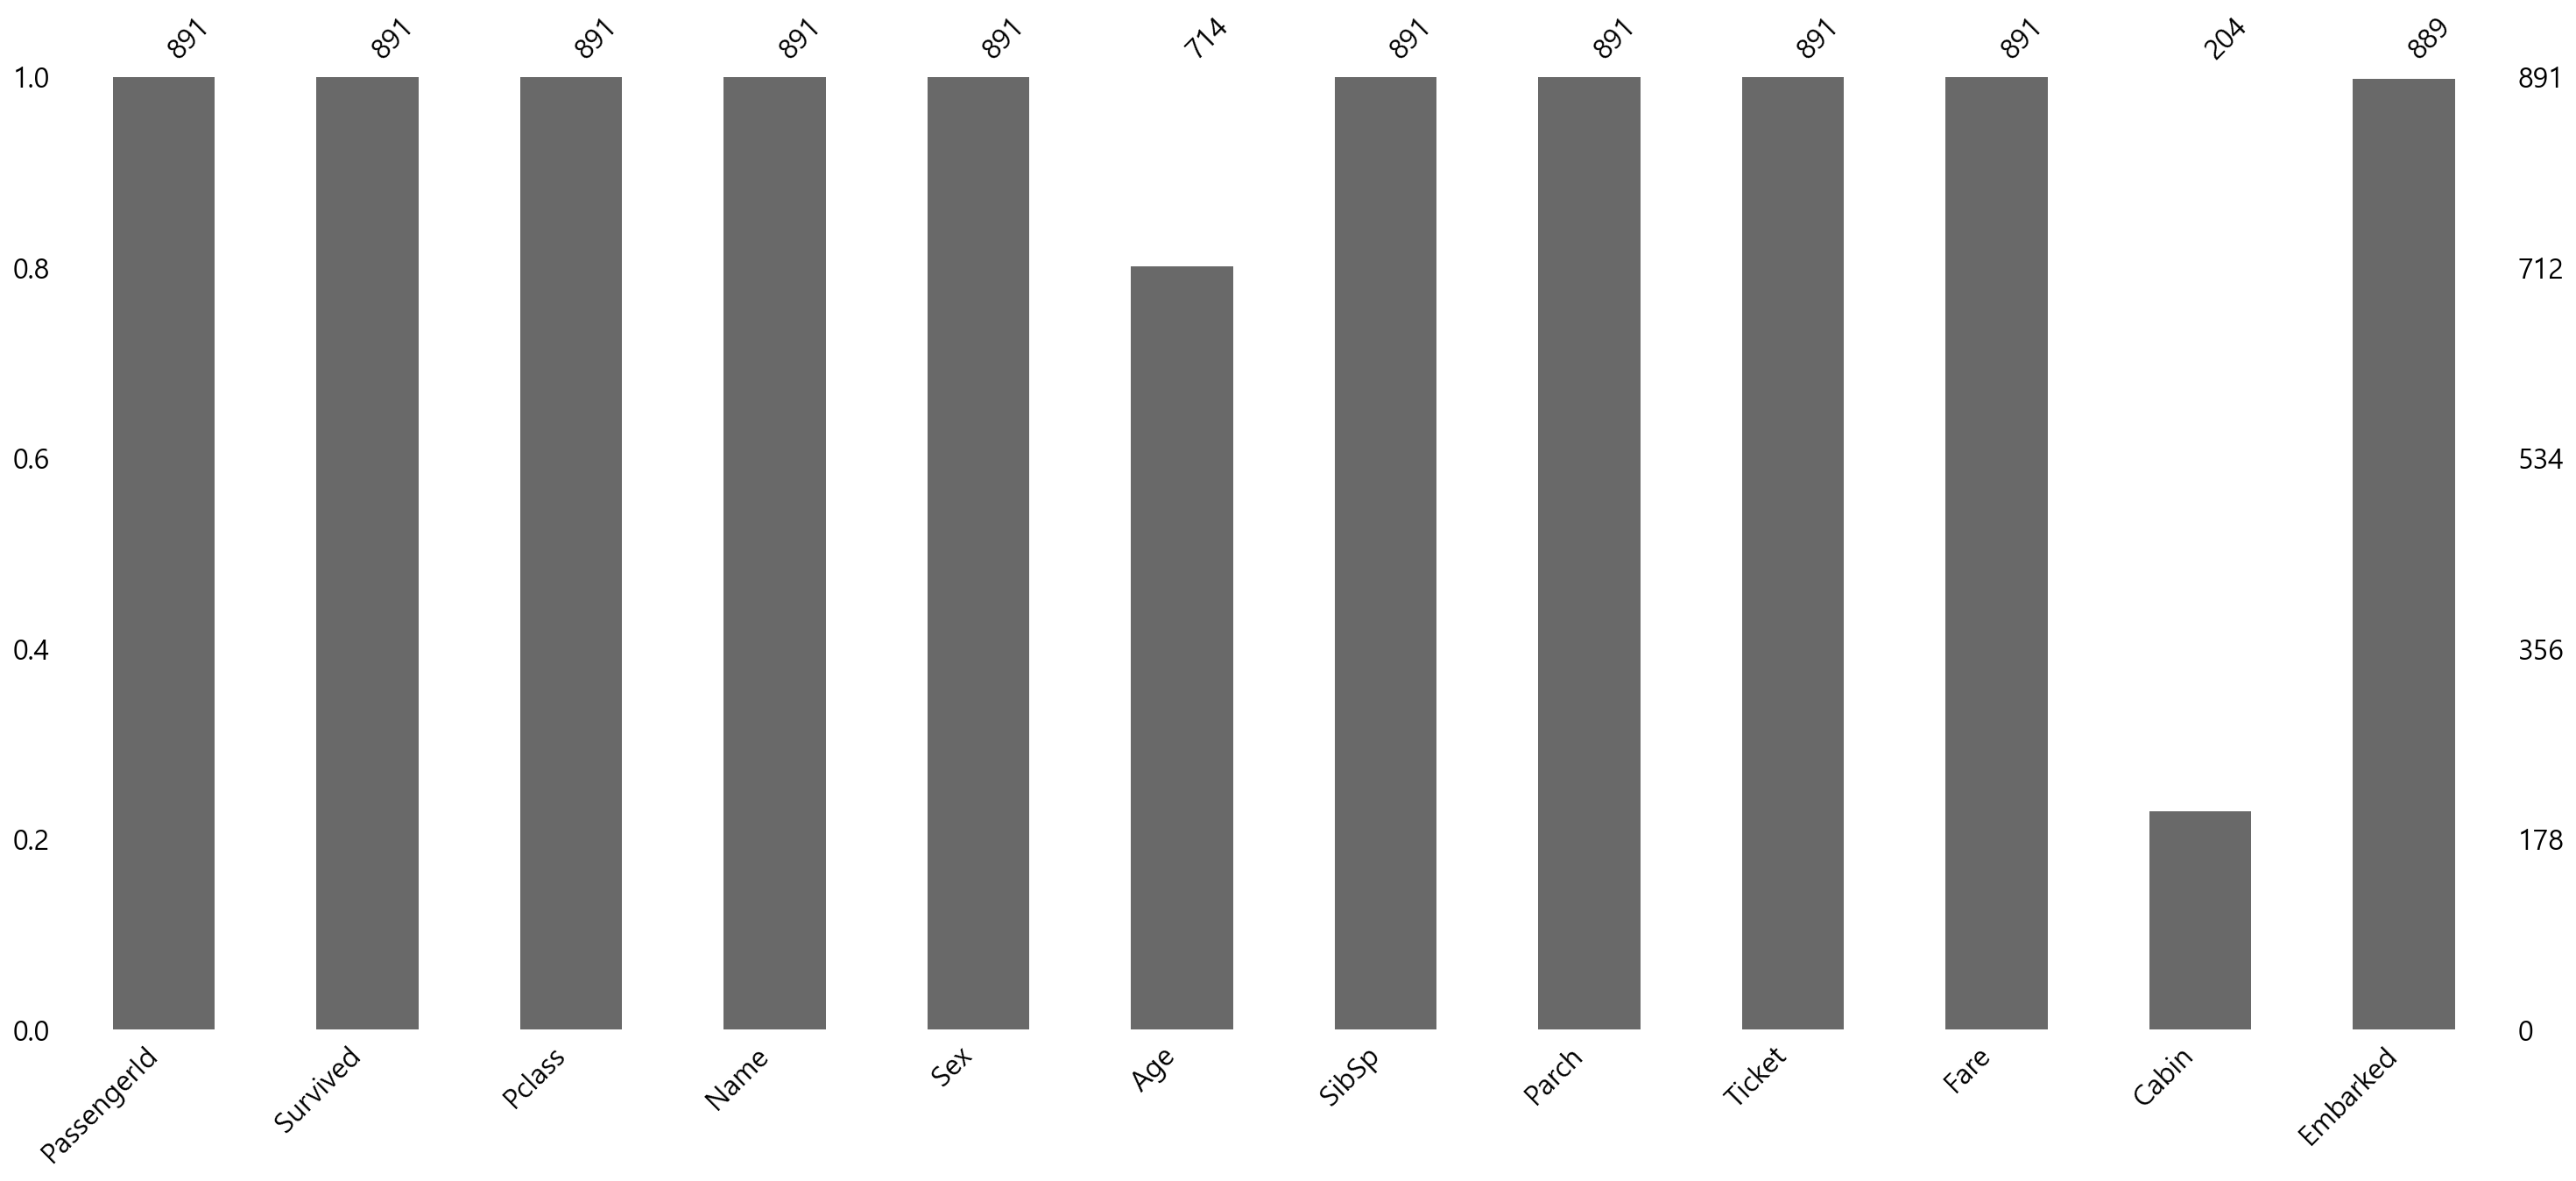

In [225]:
import missingno as msno
msno.bar(df=titanic_train)

### Survived 분석

In [226]:
#0: 사망, 1: 생존
titanic_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

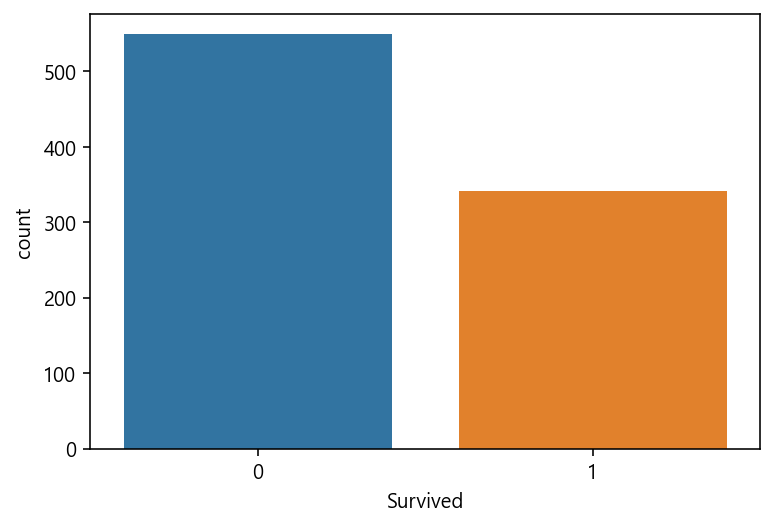

In [227]:
sns.countplot(data=titanic_train,x='Survived')

__Pclass에 따른 생존율__

In [228]:
titanic_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [229]:
pd.crosstab(titanic_train.Pclass,titanic_train.Survived,margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<AxesSubplot:xlabel='Survived', ylabel='count'>

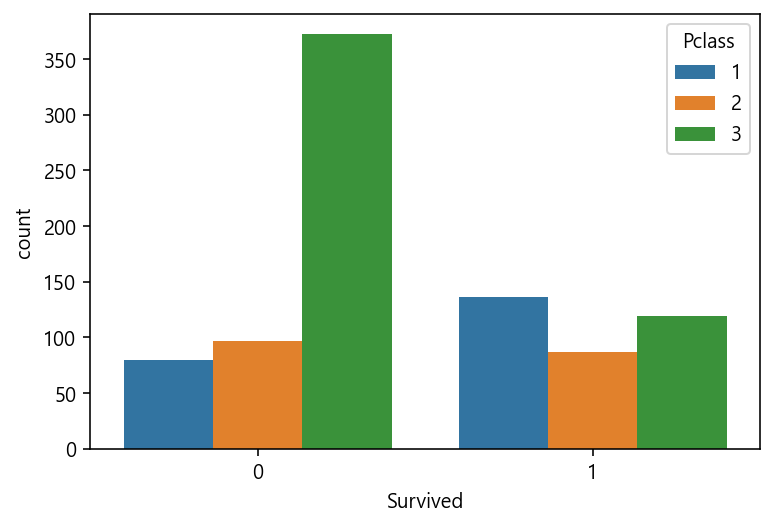

In [230]:
sns.countplot(data=titanic_train,x='Survived',hue='Pclass')

__성별(Sex)에 따른 생존율__

In [231]:
titanic_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [232]:
pd.crosstab(titanic_train.Sex,titanic_train.Survived)

Survived,0,1
Sex,,
female,81,233
male,468,109


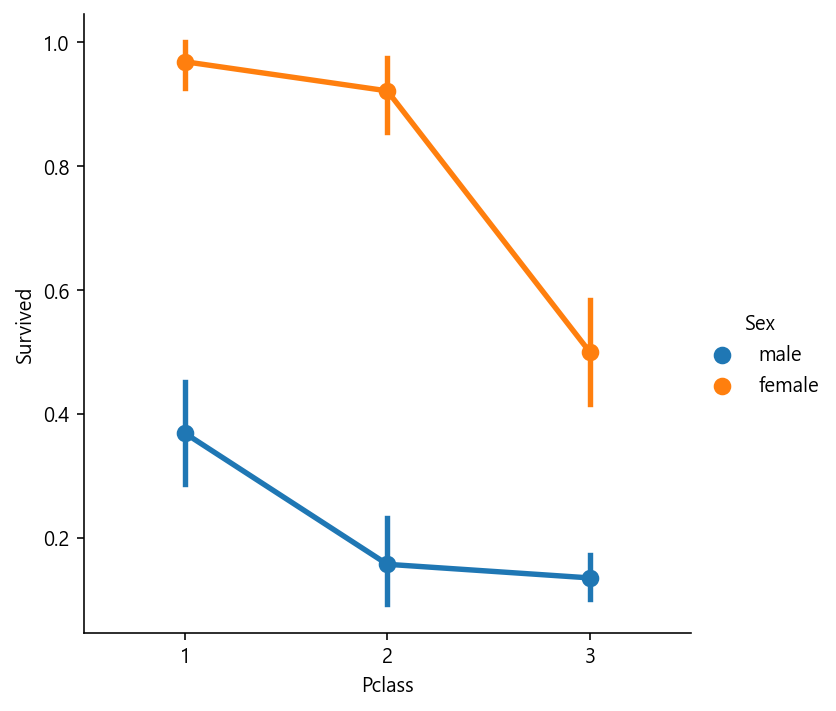

In [233]:
sns.factorplot('Pclass','Survived',hue='Sex',data=titanic_train)

__나이(Age)에 대한 생존률 분석__

In [234]:
survived_age = pd.DataFrame(titanic_train['Age'][titanic_train['Survived']==1])

In [235]:
dead_age = pd.DataFrame(titanic_train['Age'][titanic_train['Survived']==0])

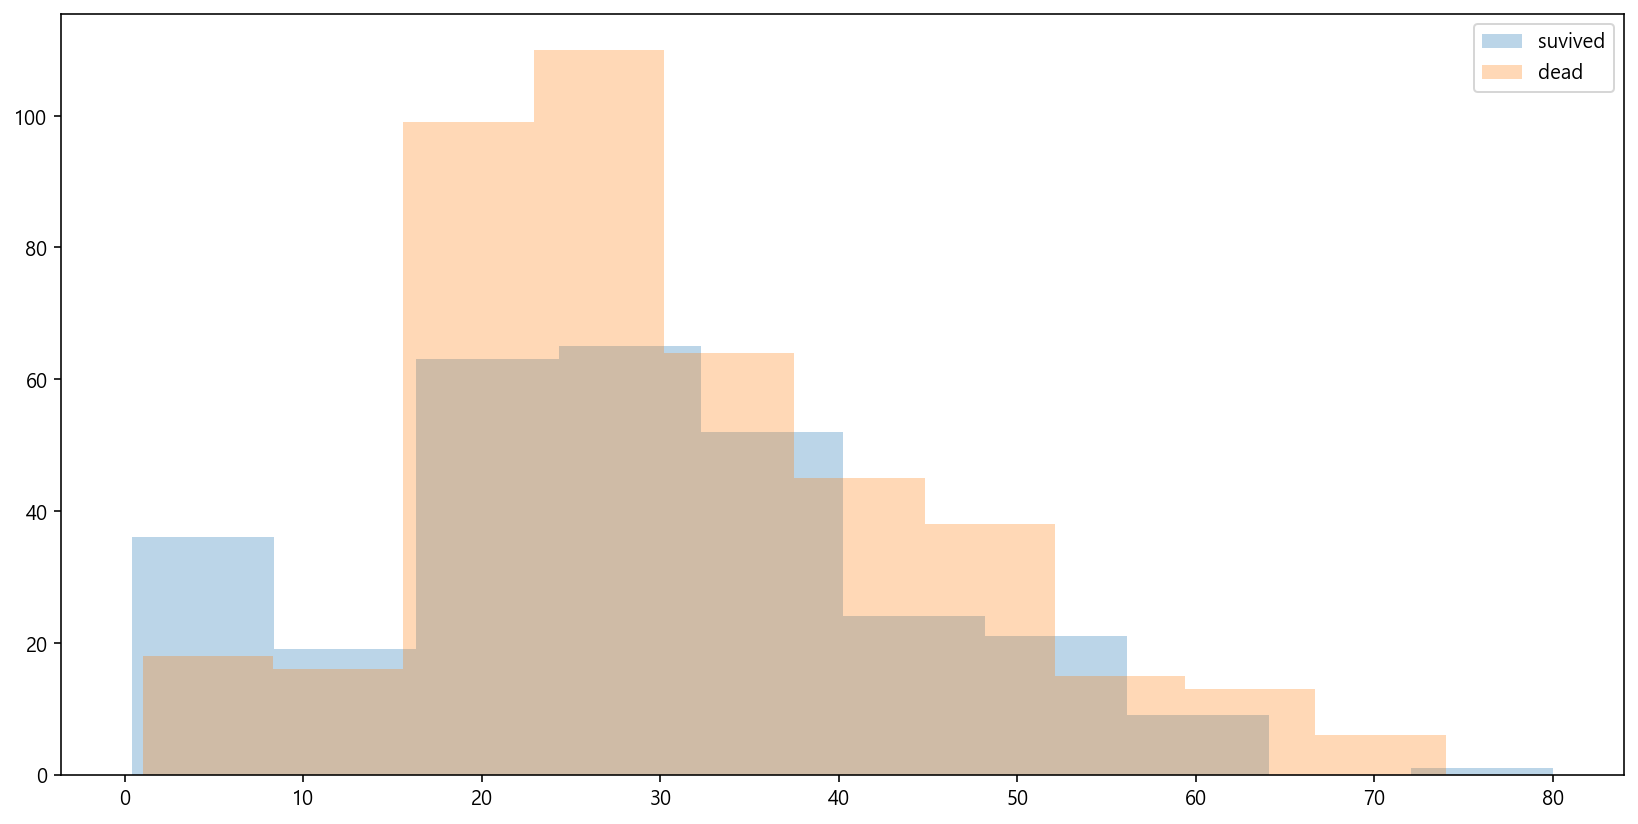

In [236]:
plt.figure(figsize=(14,7))
plt.hist(survived_age,alpha=0.3)
plt.hist(dead_age,alpha=0.3)
plt.legend(['suvived','dead'])

__Embaked(승선한 항구)에 대한 생존율 분석__

In [237]:
titanic_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [238]:
pd.crosstab(titanic_train.Embarked,titanic_train.Survived,margins=True)

Survived,0,1,All
Embarked,,,
C,75,93,168
Q,47,30,77
S,427,217,644
All,549,340,889


In [239]:
pd.crosstab(titanic_train.Embarked,titanic_train.Pclass,margins=True)

Pclass,1,2,3,All
Embarked,,,,
C,85,17,66,168
Q,2,3,72,77
S,127,164,353,644
All,214,184,491,889


#### 생존률 상관관계 분석

<AxesSubplot:>

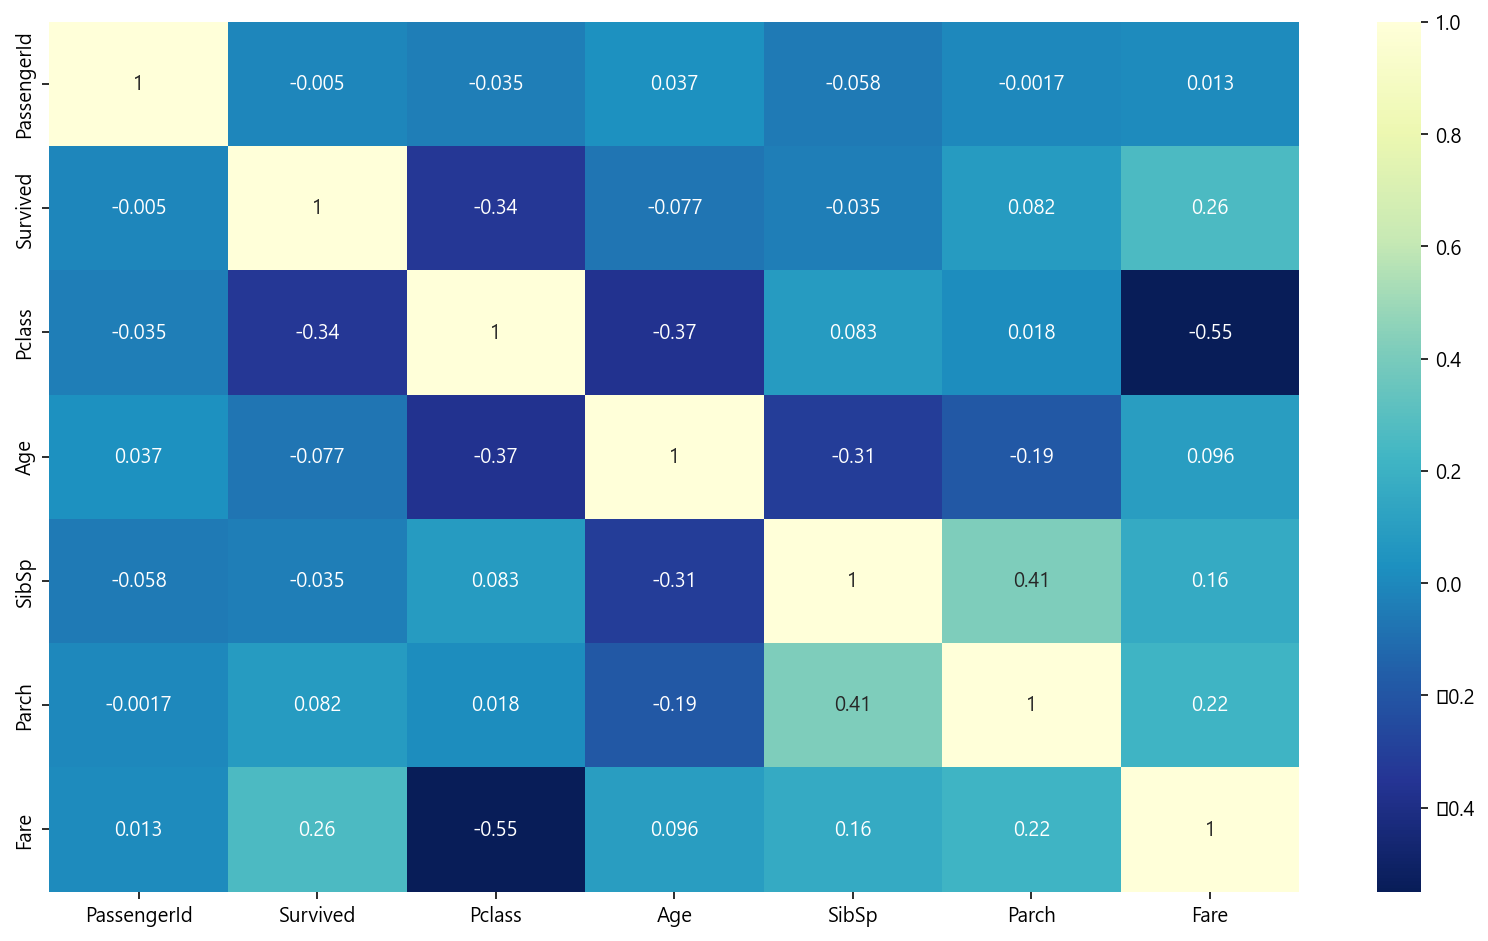

In [240]:
plt.figure(figsize=(14,8))
sns.heatmap(titanic_train.corr(),annot=True,cmap='YlGnBu_r')

In [241]:
titanic_train.corr()['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

#### 컬럼의 기울기 파악

In [242]:
titanic_train.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

__기울어짐이 4를 초과하면 특정구간에 몰려있는 칼럼__

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

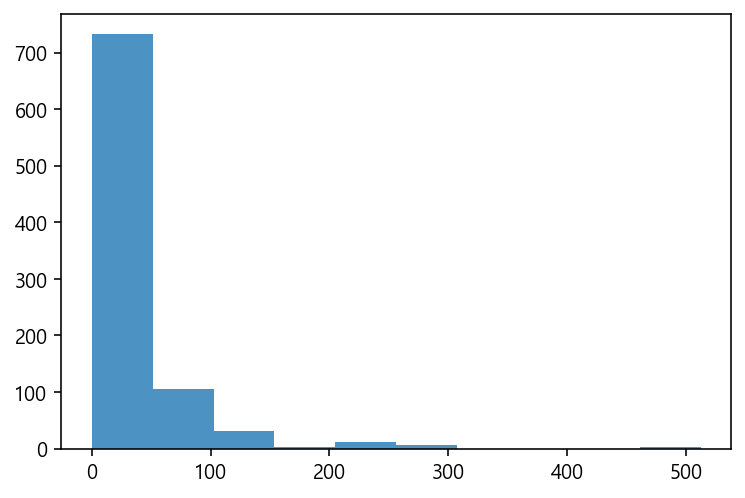

In [243]:
plt.hist(titanic_train['Fare'],alpha=0.8)

In [244]:
# 몰려 있는 분포를 정규분포 형태(이상치 영향을 적게 받게함)로 맞추기 위해 np.log1p를 사용
# np.log1p --> 데이터에 log(1+데이터)를 리턴
titanic_train['Fare']=np.log1p(titanic_train['Fare'])

(array([ 15.,   0.,   2., 350., 167., 182.,  85.,  59.,  28.,   3.]),
 array([0.        , 0.62409174, 1.24818347, 1.87227521, 2.49636694,
        3.12045868, 3.74455041, 4.36864215, 4.99273388, 5.61682562,
        6.24091735]),
 <BarContainer object of 10 artists>)

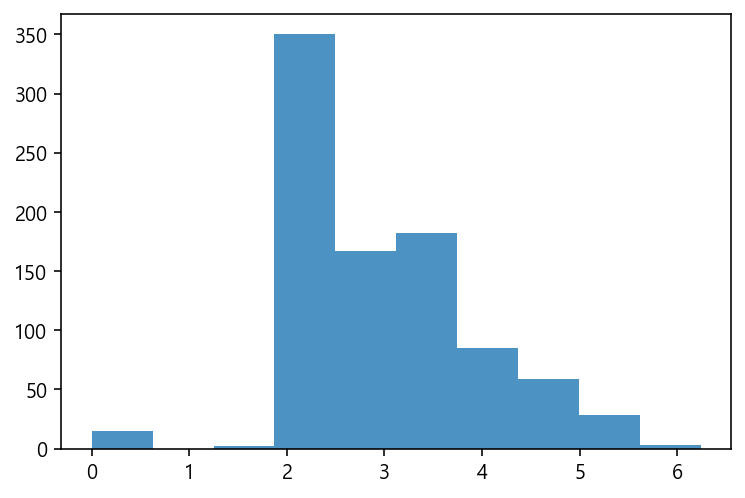

In [245]:
plt.hist(titanic_train['Fare'],alpha=0.8)

### feature 생성

#### famliy_size=> 부모(sibsp)+자식(parch)+1

In [246]:
titanic_train['Family_size']=titanic_train['SibSp']+titanic_train['Parch']+1

In [247]:
pd.crosstab(titanic_train.Family_size,titanic_train.Survived,margins=True)

Survived,0,1,All
Family_size,,,
1,374,163,537
2,72,89,161
3,43,59,102
4,8,21,29
5,12,3,15
6,19,3,22
7,8,4,12
8,6,0,6
11,7,0,7


#### sir 칼럼 추가(나이, 성별 분류)

In [248]:
#이름의 중간만 추출
titanic_train['Sir']= titanic_train.Name.str.extract('([A-Za-z]+)\.')
# 이름의 중간 --> ㅡMiss,Mrs,Mr,Master,Other로 대치
titanic_train['Sir'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [249]:
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Sir
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,2.110213,NaN,S,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,4.280593,C85,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,2.188856,NaN,S,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,3.990834,C123,S,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,2.202765,NaN,S,1,Mr
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,2.246893,NaN,Q,1,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,3.967694,E46,S,1,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,3.094446,NaN,S,5,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,2.495954,NaN,S,3,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,3.436268,NaN,C,2,Mrs


In [250]:
titanic_train['Age']=titanic_train['Age'].astype('float')

In [251]:
sir_age_mean=titanic_train.groupby('Sir').mean()[['Age']]

In [252]:
sir_age_mean=sir_age_mean[['Age']].round(2)

In [255]:
sir_age_mean.reset_index()

,Sir,Age
0,Master,4.57
1,Miss,21.86
2,Mr,32.74
3,Mrs,35.98
4,Other,45.89


In [256]:
titanic_train=titanic_train.merge(sir_age_mean,on='Sir',how='left')

In [257]:
titanic_train=titanic_train.rename(columns={'Age_x':'Age',
                                           'Age_y':'Sir_mean_age'})

In [258]:
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Sir,Sir_mean_age
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,2.110213,NaN,S,2,Mr,32.74
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.280593,C85,C,2,Mrs,35.98
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.188856,NaN,S,1,Miss,21.86
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.990834,C123,S,2,Mrs,35.98
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.202765,NaN,S,1,Mr,32.74
5,6,0,3,"Moran, Mr. James",male,nan,0,0,330877,2.246893,NaN,Q,1,Mr,32.74
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,3.967694,E46,S,1,Mr,32.74
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,3.094446,NaN,S,5,Master,4.57
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,2.495954,NaN,S,3,Mrs,35.98
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,3.436268,NaN,C,2,Mrs,35.98


In [259]:
titanic_train['Age']=titanic_train['Age'].fillna('nan')

In [260]:
titanic_train['Age']=np.where(titanic_train['Age']=='nan',titanic_train['Sir_mean_age'],titanic_train['Age'])

In [263]:
titanic_train.drop(columns=['Sir_mean_age'],inplace=True)

#### Embaked(승선항구) 결측치 처리

In [264]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Family_size      0
Sir              0
dtype: int64

In [267]:
pd.crosstab(titanic_train.Sir,titanic_train.Embarked)

Embarked,C,Q,S
Sir,,,
Master,5,4,31
Miss,41,33,111
Mr,89,36,404
Mrs,32,3,91
Other,1,1,7


In [265]:
titanic_train[titanic_train['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Sir
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,4.394449,B28,NaN,1,Miss
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,4.394449,B28,NaN,1,Mrs


In [268]:
titanic_train.fillna('S',inplace=True)

### 데이터 변환

In [269]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
 12  Family_size  891 non-null    int64  
 13  Sir          891 non-null    object 
dtypes: float64(2), int64(6), object(6)
memory usage: 104.4+ KB


In [273]:
def age(a):
    return a//10

In [274]:
titanic_train['Age_Divide']=titanic_train['Age'].apply(age)

In [275]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Sir,Age_Divide
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,2.110213,S,S,2,Mr,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.280593,C85,C,2,Mrs,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.188856,S,S,1,Miss,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.990834,C123,S,2,Mrs,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.202765,S,S,1,Mr,3.0


In [280]:
titanic_train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [279]:
titanic_train['Sir_number']=titanic_train['Sir'].replace({'Mr':0,'Mrs':1,'Miss':2,'Master':3,'Other':4})

In [281]:
titanic_train['Embarked_number']=titanic_train['Embarked'].replace({'S':0,'C':1,'Q':2})

In [283]:
titanic_train['Sex']=titanic_train['Sex'].replace({'male':0,'female':1})

In [284]:
titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family_size', 'Sir',
       'Age_Divide', 'Sir_number', 'Embarked_number'],
      dtype='object')

### 데이터 제거 및 훈련 세트 분리

In [290]:
X = titanic_train.drop(columns=['PassengerId','Name','Age','Cabin','Ticket','Embarked','Sir','Survived'])

In [291]:
X

,Pclass,Sex,SibSp,Parch,Fare,Family_size,Age_Divide,Sir_number,Embarked_number
0,3,0,1,0,2.110213,2,2.0,0,0
1,1,1,1,0,4.280593,2,3.0,1,1
2,3,1,0,0,2.188856,1,2.0,2,0
3,1,1,1,0,3.990834,2,3.0,1,0
4,3,0,0,0,2.202765,1,3.0,0,0
5,3,0,0,0,2.246893,1,3.0,0,2
6,1,0,0,0,3.967694,1,5.0,0,0
7,3,0,3,1,3.094446,5,0.0,3,0
8,3,1,0,2,2.495954,3,2.0,1,0
9,2,1,1,0,3.436268,2,1.0,1,1


In [292]:
y= titanic_train['Survived']

In [294]:
y

0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     0
15     1
16     0
17     1
18     0
19     1
20     0
21     1
22     1
23     1
24     0
25     1
26     0
27     0
28     1
29     0
30     0
31     1
32     1
33     0
34     0
35     0
36     1
37     0
38     0
39     1
40     0
41     0
42     0
43     1
44     1
45     0
46     0
47     1
48     0
49     0
50     0
51     0
52     1
53     1
54     0
55     1
56     1
57     0
58     1
59     0
60     0
61     1
62     0
63     0
64     0
65     1
66     1
67     0
68     1
69     0
70     0
71     0
72     0
73     0
74     1
75     0
76     0
77     0
78     1
79     1
80     0
81     1
82     1
83     0
84     1
85     1
86     0
87     0
88     1
89     0
90     0
91     0
92     0
93     0
94     0
95     0
96     0
97     1
98     1
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    1
107    1
108    0
109    1
110    0
1

In [297]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=44)

In [298]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(712, 9) (712,)
(179, 9) (179,)


### DecisionTree Classifier, RandomForest Classifier

In [316]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint,uniform

In [303]:
params= {
    'criterion':['gini','entropy'],
    'max_depth':randint(3,77),
    'min_impurity_decrease':uniform(0.0001,0.001),
    'min_samples_split':randint(3,25),
    'min_samples_leaf':randint(3,25)
}



In [319]:
rf = RandomForestClassifier(n_estimators=10,random_state=42,oob_score=True)
dt = DecisionTreeClassifier(max_depth=5,random_state=42)
sg = SGDClassifier(random_state=42)

In [342]:
from sklearn.model_selection import RandomizedSearchCV
rf_rs = RandomizedSearchCV(RandomForestClassifier(n_estimators=500,random_state=42,oob_score=True)
                          ,params,n_iter=77,n_jobs=-1,random_state=42)
# dt_rs = RandomizedSearchCV(

In [343]:
rf_rs.fit(X_train,y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(n_estimators=500,
                                                    oob_score=True,
                                                    random_state=42),
                   n_iter=77, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002558D0E4190>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002558CADCA60>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002558D22C3D0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002558AA95FD0>},
                   random_state=42)

In [344]:
print(rf_rs.best_estimator_)

RandomForestClassifier(criterion='entropy', max_depth=56,
                       min_impurity_decrease=0.0001330507329005484,
                       min_samples_leaf=3, min_samples_split=3,
                       n_estimators=500, oob_score=True, random_state=42)


In [366]:
rf = RandomForestClassifier(criterion='gini', max_depth=56,
                       min_samples_leaf=3, min_samples_split=3, oob_score=True,
                       random_state=42)

In [372]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [373]:
pred = dt.predict(X_test)

In [375]:
feature=X_train.columns

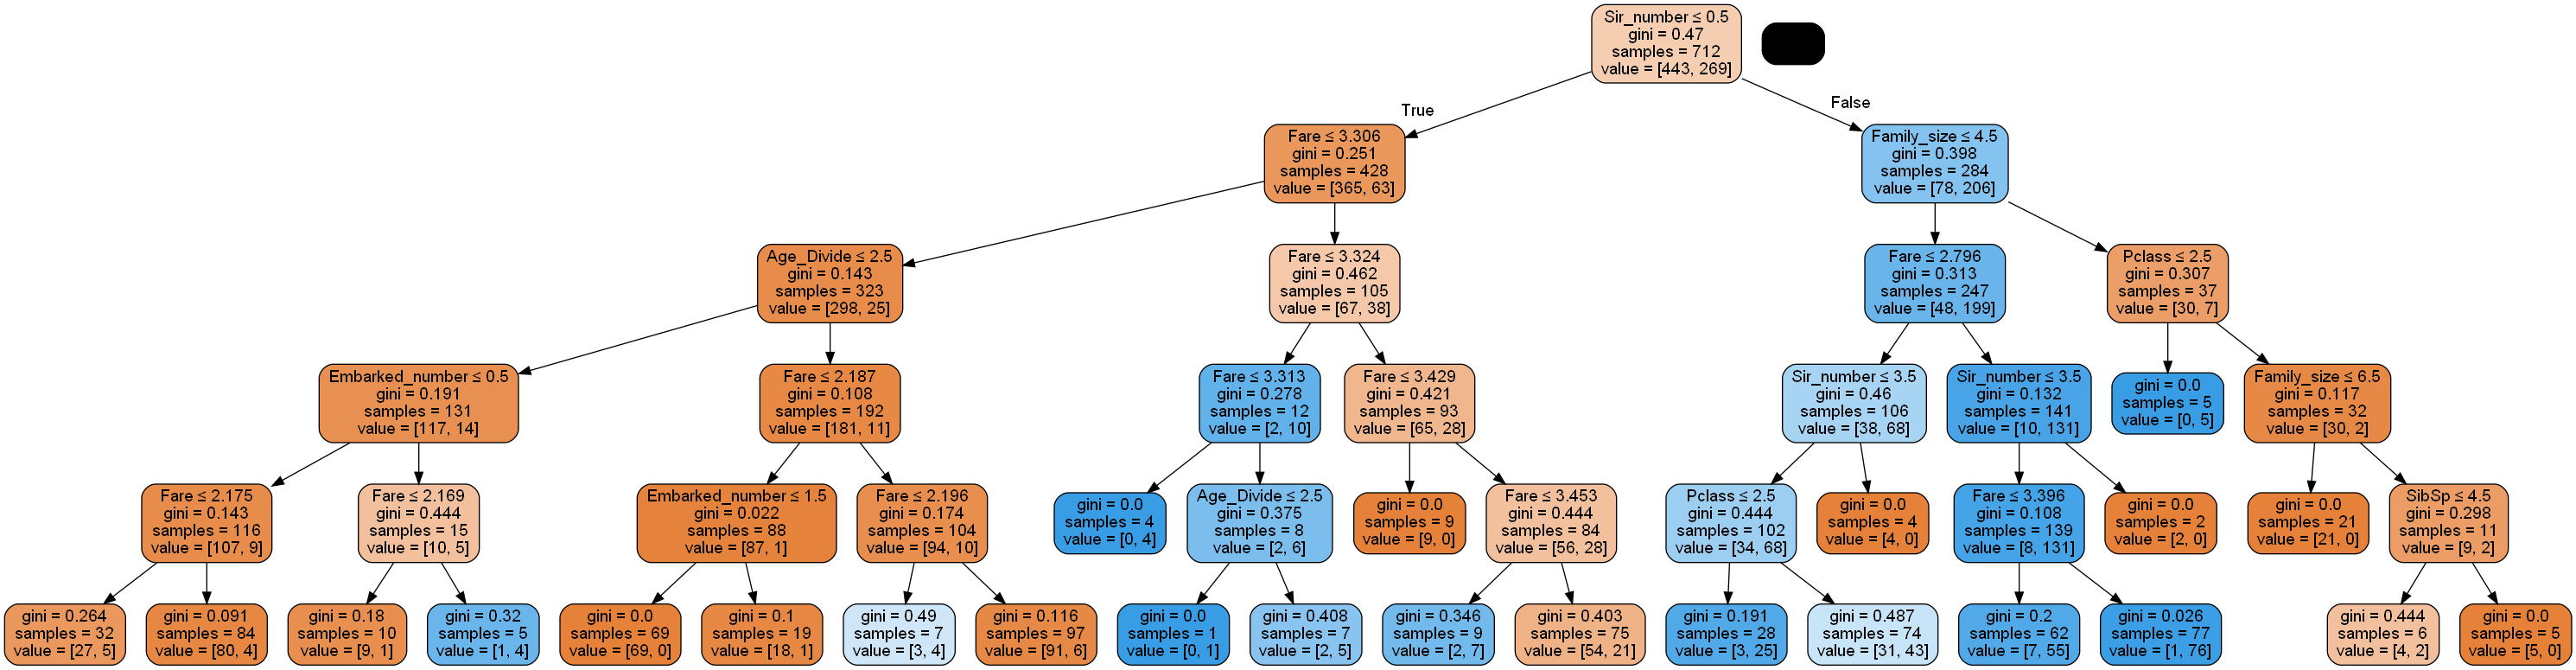

In [376]:
from sklearn import tree
dt_dot_data = tree.export_graphviz(dt,out_file=None
                                  ,feature_names=feature,
                                  class_names=None,
                                  filled=True,rounded=True,
                                  special_characters=True)
pydotplus.graph_from_dot_data(dt_dot_data)
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)
Image(dt_graph.create_png())

In [377]:
feature_importance=pd.Series(dt.feature_importances_,feature)

In [381]:
feature_importance=feature_importance.sort_values(ascending=False)

<AxesSubplot:>

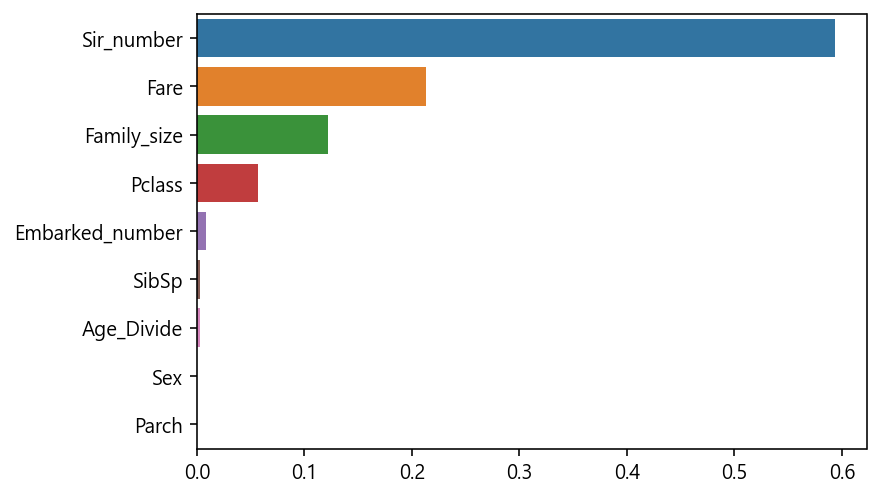

In [382]:
sns.barplot(x=feature_importance,y=feature_importance.index)

In [383]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=56, min_samples_leaf=3, min_samples_split=3,
                       oob_score=True, random_state=42)

In [384]:
pred = rf.predict(X_test)

In [374]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

print('confusion_matrix:% s '%confusion_matrix(y_test,pred))
print('accuracy: %.3f' % accuracy_score(y_test, pred))
print('precision: %.3f' % precision_score(y_test, pred))
print('recall: %.3f' % recall_score(y_test, pred))
print('F1-score: %.3f' % f1_score(y_test, pred))
print('AUC: %.3f' % roc_auc_score(y_test, pred))

from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

confusion_matrix:[[82 24]
 [25 48]] 
accuracy: 0.726
precision: 0.667
recall: 0.658
F1-score: 0.662
AUC: 0.716
              precision    recall  f1-score   support

           0       0.77      0.77      0.77       106
           1       0.67      0.66      0.66        73

    accuracy                           0.73       179
   macro avg       0.72      0.72      0.72       179
weighted avg       0.73      0.73      0.73       179



In [386]:
feature_importance2 = pd.Series(rf.feature_importances_,X_train.columns)

In [388]:
feature_importance2 =feature_importance2.sort_values(ascending=False)

<AxesSubplot:>

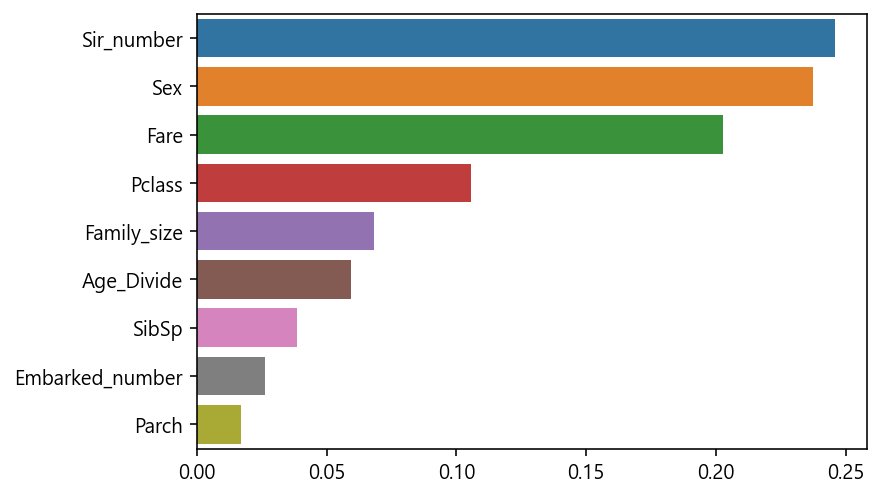

In [389]:
sns.barplot(x=feature_importance2,y=feature_importance2.index)

### XGBoost Classifier

In [393]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [394]:
xgb =XGBClassifier(n_estimators=400)

In [395]:
params = {
    'max_depth':[5,9,14,17],
    'min_child_weight':[1,3,5,7],
    'colsample_bytree':[0.5,0.75,1.0,1.25]
}

In [396]:
gridcv=GridSearchCV(xgb,param_grid=params)

In [398]:
gridcv.fit(X_train,y_train,early_stopping_rounds=30,eval_metric='error',
          eval_set=[(X_train,y_train),(X_test,y_test)])

[0]	validation_0-error:0.15309	validation_1-error:0.30726
[1]	validation_0-error:0.16854	validation_1-error:0.30168
[2]	validation_0-error:0.13764	validation_1-error:0.26257
[3]	validation_0-error:0.12781	validation_1-error:0.26257
[4]	validation_0-error:0.12781	validation_1-error:0.24022
[5]	validation_0-error:0.12079	validation_1-error:0.26257
[6]	validation_0-error:0.11938	validation_1-error:0.26257
[7]	validation_0-error:0.11376	validation_1-error:0.26257
[8]	validation_0-error:0.10955	validation_1-error:0.26257
[9]	validation_0-error:0.11517	validation_1-error:0.26257
[10]	validation_0-error:0.11376	validation_1-error:0.26816
[11]	validation_0-error:0.11657	validation_1-error:0.29609
[12]	validation_0-error:0.10815	validation_1-error:0.27374
[13]	validation_0-error:0.11095	validation_1-error:0.26257
[14]	validation_0-error:0.09972	validation_1-error:0.29609
[15]	validation_0-error:0.10674	validation_1-error:0.26816
[16]	validation_0-error:0.10393	validation_1-error:0.29609
[17]	va

[6]	validation_0-error:0.11236	validation_1-error:0.24022
[7]	validation_0-error:0.11236	validation_1-error:0.23464
[8]	validation_0-error:0.11236	validation_1-error:0.23464
[9]	validation_0-error:0.11095	validation_1-error:0.23464
[10]	validation_0-error:0.10815	validation_1-error:0.23464
[11]	validation_0-error:0.10815	validation_1-error:0.23464
[12]	validation_0-error:0.11095	validation_1-error:0.25698
[13]	validation_0-error:0.10955	validation_1-error:0.26257
[14]	validation_0-error:0.10393	validation_1-error:0.26816
[15]	validation_0-error:0.10674	validation_1-error:0.26816
[16]	validation_0-error:0.10253	validation_1-error:0.26816
[17]	validation_0-error:0.10534	validation_1-error:0.26816
[18]	validation_0-error:0.10112	validation_1-error:0.26816
[19]	validation_0-error:0.10112	validation_1-error:0.26816
[20]	validation_0-error:0.09831	validation_1-error:0.26816
[21]	validation_0-error:0.09972	validation_1-error:0.25698
[22]	validation_0-error:0.09831	validation_1-error:0.26257
[

[8]	validation_0-error:0.13343	validation_1-error:0.24022
[9]	validation_0-error:0.13202	validation_1-error:0.24581
[10]	validation_0-error:0.12219	validation_1-error:0.25140
[11]	validation_0-error:0.11798	validation_1-error:0.24581
[12]	validation_0-error:0.11376	validation_1-error:0.25140
[13]	validation_0-error:0.11376	validation_1-error:0.24581
[14]	validation_0-error:0.11376	validation_1-error:0.24581
[15]	validation_0-error:0.11095	validation_1-error:0.25140
[16]	validation_0-error:0.11376	validation_1-error:0.25140
[17]	validation_0-error:0.11095	validation_1-error:0.25140
[18]	validation_0-error:0.10815	validation_1-error:0.25140
[19]	validation_0-error:0.10955	validation_1-error:0.25140
[20]	validation_0-error:0.11236	validation_1-error:0.25140
[21]	validation_0-error:0.11095	validation_1-error:0.25140
[22]	validation_0-error:0.11376	validation_1-error:0.25698
[23]	validation_0-error:0.11095	validation_1-error:0.26257
[24]	validation_0-error:0.11236	validation_1-error:0.25698

[13]	validation_0-error:0.12640	validation_1-error:0.26816
[14]	validation_0-error:0.12500	validation_1-error:0.27374
[15]	validation_0-error:0.12921	validation_1-error:0.26816
[16]	validation_0-error:0.12500	validation_1-error:0.26816
[17]	validation_0-error:0.12360	validation_1-error:0.26257
[18]	validation_0-error:0.12360	validation_1-error:0.26816
[19]	validation_0-error:0.12219	validation_1-error:0.27374
[20]	validation_0-error:0.12079	validation_1-error:0.26816
[21]	validation_0-error:0.11938	validation_1-error:0.27374
[22]	validation_0-error:0.11376	validation_1-error:0.27374
[23]	validation_0-error:0.11376	validation_1-error:0.26816
[24]	validation_0-error:0.11095	validation_1-error:0.27374
[25]	validation_0-error:0.11376	validation_1-error:0.27374
[26]	validation_0-error:0.10955	validation_1-error:0.27374
[27]	validation_0-error:0.10955	validation_1-error:0.27933
[28]	validation_0-error:0.11095	validation_1-error:0.27374
[29]	validation_0-error:0.11236	validation_1-error:0.273

[18]	validation_0-error:0.13062	validation_1-error:0.27933
[19]	validation_0-error:0.13343	validation_1-error:0.25140
[20]	validation_0-error:0.13202	validation_1-error:0.24581
[21]	validation_0-error:0.12781	validation_1-error:0.25140
[22]	validation_0-error:0.12781	validation_1-error:0.25140
[23]	validation_0-error:0.12219	validation_1-error:0.25140
[24]	validation_0-error:0.12640	validation_1-error:0.26257
[25]	validation_0-error:0.12219	validation_1-error:0.25698
[26]	validation_0-error:0.12500	validation_1-error:0.25698
[27]	validation_0-error:0.12360	validation_1-error:0.25140
[28]	validation_0-error:0.12500	validation_1-error:0.26816
[29]	validation_0-error:0.12219	validation_1-error:0.26816
[30]	validation_0-error:0.12500	validation_1-error:0.26257
[31]	validation_0-error:0.12640	validation_1-error:0.26257
[32]	validation_0-error:0.12219	validation_1-error:0.26816
[33]	validation_0-error:0.12219	validation_1-error:0.26816
[0]	validation_0-error:0.19803	validation_1-error:0.2737

[19]	validation_0-error:0.09270	validation_1-error:0.29609
[20]	validation_0-error:0.09129	validation_1-error:0.29609
[21]	validation_0-error:0.08989	validation_1-error:0.29609
[22]	validation_0-error:0.08427	validation_1-error:0.30726
[23]	validation_0-error:0.08427	validation_1-error:0.30168
[24]	validation_0-error:0.08567	validation_1-error:0.30726
[25]	validation_0-error:0.08146	validation_1-error:0.30726
[26]	validation_0-error:0.08146	validation_1-error:0.30726
[27]	validation_0-error:0.08146	validation_1-error:0.30726
[28]	validation_0-error:0.08286	validation_1-error:0.30168
[29]	validation_0-error:0.08286	validation_1-error:0.30168
[30]	validation_0-error:0.08427	validation_1-error:0.30168
[31]	validation_0-error:0.08286	validation_1-error:0.30726
[32]	validation_0-error:0.08286	validation_1-error:0.30168
[33]	validation_0-error:0.08286	validation_1-error:0.30168
[34]	validation_0-error:0.08146	validation_1-error:0.30168
[0]	validation_0-error:0.13062	validation_1-error:0.3240

[20]	validation_0-error:0.09831	validation_1-error:0.26257
[21]	validation_0-error:0.09551	validation_1-error:0.26257
[22]	validation_0-error:0.09551	validation_1-error:0.26816
[23]	validation_0-error:0.09410	validation_1-error:0.26816
[24]	validation_0-error:0.09129	validation_1-error:0.26816
[25]	validation_0-error:0.08708	validation_1-error:0.27374
[26]	validation_0-error:0.08989	validation_1-error:0.25140
[27]	validation_0-error:0.08989	validation_1-error:0.25140
[28]	validation_0-error:0.08848	validation_1-error:0.25140
[29]	validation_0-error:0.08708	validation_1-error:0.25140
[30]	validation_0-error:0.08708	validation_1-error:0.25140
[31]	validation_0-error:0.08708	validation_1-error:0.25140
[32]	validation_0-error:0.08848	validation_1-error:0.25698
[33]	validation_0-error:0.08567	validation_1-error:0.25140
[34]	validation_0-error:0.08708	validation_1-error:0.25698
[35]	validation_0-error:0.08567	validation_1-error:0.26257
[36]	validation_0-error:0.08567	validation_1-error:0.256

[12]	validation_0-error:0.10815	validation_1-error:0.28492
[13]	validation_0-error:0.10955	validation_1-error:0.25698
[14]	validation_0-error:0.10955	validation_1-error:0.27374
[15]	validation_0-error:0.11236	validation_1-error:0.25140
[16]	validation_0-error:0.11376	validation_1-error:0.27374
[17]	validation_0-error:0.11095	validation_1-error:0.27374
[18]	validation_0-error:0.10393	validation_1-error:0.28492
[19]	validation_0-error:0.10674	validation_1-error:0.26257
[20]	validation_0-error:0.10534	validation_1-error:0.26816
[21]	validation_0-error:0.10534	validation_1-error:0.26816
[22]	validation_0-error:0.10674	validation_1-error:0.26816
[23]	validation_0-error:0.09972	validation_1-error:0.26816
[24]	validation_0-error:0.10393	validation_1-error:0.26816
[25]	validation_0-error:0.10534	validation_1-error:0.26816
[26]	validation_0-error:0.10674	validation_1-error:0.26816
[27]	validation_0-error:0.10674	validation_1-error:0.26816
[28]	validation_0-error:0.10393	validation_1-error:0.268

[20]	validation_0-error:0.11938	validation_1-error:0.27374
[21]	validation_0-error:0.11517	validation_1-error:0.27933
[22]	validation_0-error:0.11095	validation_1-error:0.27933
[23]	validation_0-error:0.11095	validation_1-error:0.27933
[24]	validation_0-error:0.10815	validation_1-error:0.27933
[25]	validation_0-error:0.10534	validation_1-error:0.27933
[26]	validation_0-error:0.10674	validation_1-error:0.27933
[27]	validation_0-error:0.10815	validation_1-error:0.27933
[28]	validation_0-error:0.10253	validation_1-error:0.27933
[29]	validation_0-error:0.10393	validation_1-error:0.27933
[30]	validation_0-error:0.10674	validation_1-error:0.27933
[31]	validation_0-error:0.10534	validation_1-error:0.27933
[32]	validation_0-error:0.10674	validation_1-error:0.27933
[33]	validation_0-error:0.10674	validation_1-error:0.27933
[0]	validation_0-error:0.18961	validation_1-error:0.25140
[1]	validation_0-error:0.16011	validation_1-error:0.27374
[2]	validation_0-error:0.15730	validation_1-error:0.21229


[29]	validation_0-error:0.11798	validation_1-error:0.28492
[30]	validation_0-error:0.11798	validation_1-error:0.28492
[31]	validation_0-error:0.12079	validation_1-error:0.28492
[32]	validation_0-error:0.11798	validation_1-error:0.26257
[0]	validation_0-error:0.19803	validation_1-error:0.27374
[1]	validation_0-error:0.19944	validation_1-error:0.34078
[2]	validation_0-error:0.16152	validation_1-error:0.23464
[3]	validation_0-error:0.16573	validation_1-error:0.27933
[4]	validation_0-error:0.15449	validation_1-error:0.25140
[5]	validation_0-error:0.15168	validation_1-error:0.25140
[6]	validation_0-error:0.14466	validation_1-error:0.25698
[7]	validation_0-error:0.14326	validation_1-error:0.25698
[8]	validation_0-error:0.14185	validation_1-error:0.25698
[9]	validation_0-error:0.13764	validation_1-error:0.25698
[10]	validation_0-error:0.13343	validation_1-error:0.25140
[11]	validation_0-error:0.13343	validation_1-error:0.25698
[12]	validation_0-error:0.13202	validation_1-error:0.26257
[13]	va

[23]	validation_0-error:0.07865	validation_1-error:0.31285
[24]	validation_0-error:0.08286	validation_1-error:0.31285
[25]	validation_0-error:0.08146	validation_1-error:0.31285
[26]	validation_0-error:0.08006	validation_1-error:0.31285
[27]	validation_0-error:0.08006	validation_1-error:0.31285
[28]	validation_0-error:0.08006	validation_1-error:0.30726
[29]	validation_0-error:0.08146	validation_1-error:0.30726
[30]	validation_0-error:0.08006	validation_1-error:0.30726
[31]	validation_0-error:0.08146	validation_1-error:0.30726
[32]	validation_0-error:0.08286	validation_1-error:0.31285
[33]	validation_0-error:0.08146	validation_1-error:0.31285
[0]	validation_0-error:0.13062	validation_1-error:0.32402
[1]	validation_0-error:0.13062	validation_1-error:0.30168
[2]	validation_0-error:0.12079	validation_1-error:0.27933
[3]	validation_0-error:0.11376	validation_1-error:0.27933
[4]	validation_0-error:0.11376	validation_1-error:0.28492
[5]	validation_0-error:0.11517	validation_1-error:0.29609
[6]

[16]	validation_0-error:0.09410	validation_1-error:0.27374
[17]	validation_0-error:0.09129	validation_1-error:0.27374
[18]	validation_0-error:0.09410	validation_1-error:0.26816
[19]	validation_0-error:0.09270	validation_1-error:0.26816
[20]	validation_0-error:0.09129	validation_1-error:0.27374
[21]	validation_0-error:0.08708	validation_1-error:0.27374
[22]	validation_0-error:0.08848	validation_1-error:0.27374
[23]	validation_0-error:0.08848	validation_1-error:0.27933
[24]	validation_0-error:0.08848	validation_1-error:0.27374
[25]	validation_0-error:0.08989	validation_1-error:0.27374
[26]	validation_0-error:0.08708	validation_1-error:0.27374
[27]	validation_0-error:0.08848	validation_1-error:0.27374
[28]	validation_0-error:0.08848	validation_1-error:0.27374
[29]	validation_0-error:0.08848	validation_1-error:0.27374
[30]	validation_0-error:0.08708	validation_1-error:0.27374
[31]	validation_0-error:0.08989	validation_1-error:0.26816
[32]	validation_0-error:0.09129	validation_1-error:0.262

[15]	validation_0-error:0.10534	validation_1-error:0.24581
[16]	validation_0-error:0.10112	validation_1-error:0.27933
[17]	validation_0-error:0.10253	validation_1-error:0.26257
[18]	validation_0-error:0.09972	validation_1-error:0.27933
[19]	validation_0-error:0.09972	validation_1-error:0.27933
[20]	validation_0-error:0.10112	validation_1-error:0.27374
[21]	validation_0-error:0.09972	validation_1-error:0.27933
[22]	validation_0-error:0.09691	validation_1-error:0.27374
[23]	validation_0-error:0.09691	validation_1-error:0.27933
[24]	validation_0-error:0.09551	validation_1-error:0.25698
[25]	validation_0-error:0.09410	validation_1-error:0.25698
[26]	validation_0-error:0.09551	validation_1-error:0.26257
[27]	validation_0-error:0.09551	validation_1-error:0.25698
[28]	validation_0-error:0.09270	validation_1-error:0.26257
[29]	validation_0-error:0.09270	validation_1-error:0.26257
[30]	validation_0-error:0.09410	validation_1-error:0.26257
[31]	validation_0-error:0.09551	validation_1-error:0.256

[18]	validation_0-error:0.11657	validation_1-error:0.25140
[19]	validation_0-error:0.11798	validation_1-error:0.25140
[20]	validation_0-error:0.11657	validation_1-error:0.25140
[21]	validation_0-error:0.11376	validation_1-error:0.27374
[22]	validation_0-error:0.11657	validation_1-error:0.27933
[23]	validation_0-error:0.11376	validation_1-error:0.25140
[24]	validation_0-error:0.11938	validation_1-error:0.25698
[25]	validation_0-error:0.11938	validation_1-error:0.25698
[26]	validation_0-error:0.11938	validation_1-error:0.25698
[27]	validation_0-error:0.11657	validation_1-error:0.25698
[28]	validation_0-error:0.11938	validation_1-error:0.25698
[29]	validation_0-error:0.11938	validation_1-error:0.25698
[30]	validation_0-error:0.12219	validation_1-error:0.25698
[31]	validation_0-error:0.11798	validation_1-error:0.25698
[32]	validation_0-error:0.11798	validation_1-error:0.25698
[0]	validation_0-error:0.19382	validation_1-error:0.32402
[1]	validation_0-error:0.18258	validation_1-error:0.30168

[25]	validation_0-error:0.12360	validation_1-error:0.24022
[26]	validation_0-error:0.12360	validation_1-error:0.23464
[27]	validation_0-error:0.11938	validation_1-error:0.23464
[28]	validation_0-error:0.11938	validation_1-error:0.24581
[29]	validation_0-error:0.11798	validation_1-error:0.25140
[30]	validation_0-error:0.11938	validation_1-error:0.24022
[31]	validation_0-error:0.12360	validation_1-error:0.24581
[0]	validation_0-error:0.19803	validation_1-error:0.27374
[1]	validation_0-error:0.17837	validation_1-error:0.31844
[2]	validation_0-error:0.18399	validation_1-error:0.24581
[3]	validation_0-error:0.16433	validation_1-error:0.22346
[4]	validation_0-error:0.15168	validation_1-error:0.26257
[5]	validation_0-error:0.13764	validation_1-error:0.25698
[6]	validation_0-error:0.13764	validation_1-error:0.22905
[7]	validation_0-error:0.14045	validation_1-error:0.22905
[8]	validation_0-error:0.15028	validation_1-error:0.24022
[9]	validation_0-error:0.13624	validation_1-error:0.24581
[10]	va

[32]	validation_0-error:0.12640	validation_1-error:0.22905
[33]	validation_0-error:0.12500	validation_1-error:0.23464
[34]	validation_0-error:0.12500	validation_1-error:0.23464
[35]	validation_0-error:0.12500	validation_1-error:0.22905
[36]	validation_0-error:0.12360	validation_1-error:0.22905
[37]	validation_0-error:0.12500	validation_1-error:0.22905
[38]	validation_0-error:0.12360	validation_1-error:0.23464
[39]	validation_0-error:0.12500	validation_1-error:0.23464
[40]	validation_0-error:0.12500	validation_1-error:0.23464
[41]	validation_0-error:0.11938	validation_1-error:0.23464
[42]	validation_0-error:0.12360	validation_1-error:0.22905
[43]	validation_0-error:0.12079	validation_1-error:0.23464
[44]	validation_0-error:0.12079	validation_1-error:0.23464
[45]	validation_0-error:0.12079	validation_1-error:0.23464
[46]	validation_0-error:0.12079	validation_1-error:0.23464
[47]	validation_0-error:0.12079	validation_1-error:0.23464
[0]	validation_0-error:0.12921	validation_1-error:0.3072

[9]	validation_0-error:0.09410	validation_1-error:0.29050
[10]	validation_0-error:0.09270	validation_1-error:0.26257
[11]	validation_0-error:0.09129	validation_1-error:0.26816
[12]	validation_0-error:0.08708	validation_1-error:0.27933
[13]	validation_0-error:0.08989	validation_1-error:0.27933
[14]	validation_0-error:0.08708	validation_1-error:0.27933
[15]	validation_0-error:0.08567	validation_1-error:0.28492
[16]	validation_0-error:0.08567	validation_1-error:0.28492
[17]	validation_0-error:0.08708	validation_1-error:0.27933
[18]	validation_0-error:0.08708	validation_1-error:0.27374
[19]	validation_0-error:0.08567	validation_1-error:0.27933
[20]	validation_0-error:0.08708	validation_1-error:0.27933
[21]	validation_0-error:0.08708	validation_1-error:0.26816
[22]	validation_0-error:0.08567	validation_1-error:0.27374
[23]	validation_0-error:0.08427	validation_1-error:0.27933
[24]	validation_0-error:0.08006	validation_1-error:0.27374
[25]	validation_0-error:0.08146	validation_1-error:0.2681

[43]	validation_0-error:0.10253	validation_1-error:0.26257
[44]	validation_0-error:0.10253	validation_1-error:0.26257
[45]	validation_0-error:0.10112	validation_1-error:0.28492
[46]	validation_0-error:0.10112	validation_1-error:0.28492
[47]	validation_0-error:0.10112	validation_1-error:0.26257
[48]	validation_0-error:0.10112	validation_1-error:0.26257
[49]	validation_0-error:0.10112	validation_1-error:0.26257
[50]	validation_0-error:0.10253	validation_1-error:0.26257
[51]	validation_0-error:0.10534	validation_1-error:0.25698
[52]	validation_0-error:0.10393	validation_1-error:0.26257
[53]	validation_0-error:0.10393	validation_1-error:0.25698
[54]	validation_0-error:0.10112	validation_1-error:0.27933
[55]	validation_0-error:0.10112	validation_1-error:0.25698
[56]	validation_0-error:0.10112	validation_1-error:0.27933
[57]	validation_0-error:0.09972	validation_1-error:0.28492
[58]	validation_0-error:0.09831	validation_1-error:0.28492
[59]	validation_0-error:0.09831	validation_1-error:0.284

[12]	validation_0-error:0.12781	validation_1-error:0.25698
[13]	validation_0-error:0.12500	validation_1-error:0.25698
[14]	validation_0-error:0.12360	validation_1-error:0.24581
[15]	validation_0-error:0.11938	validation_1-error:0.24581
[16]	validation_0-error:0.12219	validation_1-error:0.24581
[17]	validation_0-error:0.11938	validation_1-error:0.25140
[18]	validation_0-error:0.11938	validation_1-error:0.25140
[19]	validation_0-error:0.11657	validation_1-error:0.24581
[20]	validation_0-error:0.11798	validation_1-error:0.24581
[21]	validation_0-error:0.11798	validation_1-error:0.25698
[22]	validation_0-error:0.11798	validation_1-error:0.25698
[23]	validation_0-error:0.11376	validation_1-error:0.25698
[24]	validation_0-error:0.11657	validation_1-error:0.24581
[25]	validation_0-error:0.11798	validation_1-error:0.24022
[26]	validation_0-error:0.11798	validation_1-error:0.24581
[27]	validation_0-error:0.11657	validation_1-error:0.24581
[28]	validation_0-error:0.11798	validation_1-error:0.245

[22]	validation_0-error:0.11938	validation_1-error:0.24022
[23]	validation_0-error:0.11236	validation_1-error:0.24022
[24]	validation_0-error:0.11236	validation_1-error:0.24581
[25]	validation_0-error:0.11376	validation_1-error:0.24581
[26]	validation_0-error:0.11376	validation_1-error:0.24581
[27]	validation_0-error:0.11376	validation_1-error:0.24581
[28]	validation_0-error:0.11376	validation_1-error:0.24581
[29]	validation_0-error:0.11376	validation_1-error:0.24581
[30]	validation_0-error:0.11517	validation_1-error:0.24581
[31]	validation_0-error:0.11657	validation_1-error:0.24581
[0]	validation_0-error:0.19803	validation_1-error:0.27374
[1]	validation_0-error:0.19944	validation_1-error:0.30726
[2]	validation_0-error:0.16152	validation_1-error:0.20670
[3]	validation_0-error:0.16292	validation_1-error:0.21788
[4]	validation_0-error:0.16011	validation_1-error:0.24022
[5]	validation_0-error:0.15449	validation_1-error:0.24022
[6]	validation_0-error:0.14607	validation_1-error:0.24022
[7]	

[31]	validation_0-error:0.11798	validation_1-error:0.25698
[32]	validation_0-error:0.11938	validation_1-error:0.25698
[0]	validation_0-error:0.19803	validation_1-error:0.27374
[1]	validation_0-error:0.21489	validation_1-error:0.30726
[2]	validation_0-error:0.15590	validation_1-error:0.21788
[3]	validation_0-error:0.15871	validation_1-error:0.22346
[4]	validation_0-error:0.14888	validation_1-error:0.22346
[5]	validation_0-error:0.14185	validation_1-error:0.25698
[6]	validation_0-error:0.14607	validation_1-error:0.24581
[7]	validation_0-error:0.15309	validation_1-error:0.22346
[8]	validation_0-error:0.15168	validation_1-error:0.21788
[9]	validation_0-error:0.14185	validation_1-error:0.22346
[10]	validation_0-error:0.14326	validation_1-error:0.21788
[11]	validation_0-error:0.14326	validation_1-error:0.21788
[12]	validation_0-error:0.14326	validation_1-error:0.22346
[13]	validation_0-error:0.14045	validation_1-error:0.22346
[14]	validation_0-error:0.14045	validation_1-error:0.22905
[15]	va

[28]	validation_0-error:0.08146	validation_1-error:0.27374
[29]	validation_0-error:0.08006	validation_1-error:0.27933
[0]	validation_0-error:0.14326	validation_1-error:0.27933
[1]	validation_0-error:0.13062	validation_1-error:0.29609
[2]	validation_0-error:0.12921	validation_1-error:0.28492
[3]	validation_0-error:0.11938	validation_1-error:0.25140
[4]	validation_0-error:0.11657	validation_1-error:0.25698
[5]	validation_0-error:0.11236	validation_1-error:0.26257
[6]	validation_0-error:0.11236	validation_1-error:0.26257
[7]	validation_0-error:0.11236	validation_1-error:0.26257
[8]	validation_0-error:0.11095	validation_1-error:0.25140
[9]	validation_0-error:0.11095	validation_1-error:0.27374
[10]	validation_0-error:0.11376	validation_1-error:0.27374
[11]	validation_0-error:0.10815	validation_1-error:0.26816
[12]	validation_0-error:0.10534	validation_1-error:0.26816
[13]	validation_0-error:0.10815	validation_1-error:0.27374
[14]	validation_0-error:0.10674	validation_1-error:0.27933
[15]	va

[30]	validation_0-error:0.11236	validation_1-error:0.28492
[31]	validation_0-error:0.11376	validation_1-error:0.28492
[32]	validation_0-error:0.11095	validation_1-error:0.27374
[33]	validation_0-error:0.11095	validation_1-error:0.27933
[34]	validation_0-error:0.11236	validation_1-error:0.27933
[35]	validation_0-error:0.10815	validation_1-error:0.27933
[36]	validation_0-error:0.11236	validation_1-error:0.28492
[37]	validation_0-error:0.10955	validation_1-error:0.27374
[38]	validation_0-error:0.10815	validation_1-error:0.27933
[39]	validation_0-error:0.10534	validation_1-error:0.28492
[40]	validation_0-error:0.10674	validation_1-error:0.27933
[41]	validation_0-error:0.10534	validation_1-error:0.29050
[42]	validation_0-error:0.10815	validation_1-error:0.25698
[43]	validation_0-error:0.10393	validation_1-error:0.26816
[44]	validation_0-error:0.10674	validation_1-error:0.25698
[45]	validation_0-error:0.10253	validation_1-error:0.28492
[46]	validation_0-error:0.10393	validation_1-error:0.284

[10]	validation_0-error:0.13202	validation_1-error:0.24022
[11]	validation_0-error:0.13062	validation_1-error:0.23464
[12]	validation_0-error:0.12500	validation_1-error:0.24581
[13]	validation_0-error:0.13343	validation_1-error:0.24581
[14]	validation_0-error:0.12640	validation_1-error:0.25698
[15]	validation_0-error:0.12360	validation_1-error:0.25140
[16]	validation_0-error:0.12219	validation_1-error:0.25698
[17]	validation_0-error:0.12219	validation_1-error:0.26257
[18]	validation_0-error:0.12360	validation_1-error:0.26257
[19]	validation_0-error:0.12360	validation_1-error:0.26257
[20]	validation_0-error:0.12079	validation_1-error:0.25140
[21]	validation_0-error:0.12219	validation_1-error:0.27374
[22]	validation_0-error:0.12360	validation_1-error:0.25698
[23]	validation_0-error:0.11798	validation_1-error:0.26257
[24]	validation_0-error:0.12079	validation_1-error:0.26257
[25]	validation_0-error:0.12219	validation_1-error:0.26257
[26]	validation_0-error:0.12079	validation_1-error:0.262

[43]	validation_0-error:0.10955	validation_1-error:0.25698
[44]	validation_0-error:0.11236	validation_1-error:0.25698
[0]	validation_0-error:0.19803	validation_1-error:0.27374
[1]	validation_0-error:0.16152	validation_1-error:0.22905
[2]	validation_0-error:0.16152	validation_1-error:0.22346
[3]	validation_0-error:0.15449	validation_1-error:0.20670
[4]	validation_0-error:0.14185	validation_1-error:0.21788
[5]	validation_0-error:0.14045	validation_1-error:0.21229
[6]	validation_0-error:0.13905	validation_1-error:0.21229
[7]	validation_0-error:0.14045	validation_1-error:0.21229
[8]	validation_0-error:0.14185	validation_1-error:0.21788
[9]	validation_0-error:0.13483	validation_1-error:0.21788
[10]	validation_0-error:0.13764	validation_1-error:0.21788
[11]	validation_0-error:0.13764	validation_1-error:0.21229
[12]	validation_0-error:0.13202	validation_1-error:0.22346
[13]	validation_0-error:0.13062	validation_1-error:0.22905
[14]	validation_0-error:0.12640	validation_1-error:0.22905
[15]	va

[37]	validation_0-error:0.11095	validation_1-error:0.26257
[38]	validation_0-error:0.10955	validation_1-error:0.26816
[39]	validation_0-error:0.11095	validation_1-error:0.24581
[40]	validation_0-error:0.11095	validation_1-error:0.24581
[41]	validation_0-error:0.10955	validation_1-error:0.25698
[0]	validation_0-error:0.17977	validation_1-error:0.26257
[1]	validation_0-error:0.16854	validation_1-error:0.25140
[2]	validation_0-error:0.16011	validation_1-error:0.22905
[3]	validation_0-error:0.15168	validation_1-error:0.20670
[4]	validation_0-error:0.15590	validation_1-error:0.21229
[5]	validation_0-error:0.15590	validation_1-error:0.20670
[6]	validation_0-error:0.15309	validation_1-error:0.21788
[7]	validation_0-error:0.14466	validation_1-error:0.21788
[8]	validation_0-error:0.14466	validation_1-error:0.22346
[9]	validation_0-error:0.14747	validation_1-error:0.22905
[10]	validation_0-error:0.14185	validation_1-error:0.23464
[11]	validation_0-error:0.13764	validation_1-error:0.22905
[12]	va

[36]	validation_0-error:0.07444	validation_1-error:0.30168
[37]	validation_0-error:0.07303	validation_1-error:0.30168
[38]	validation_0-error:0.07444	validation_1-error:0.30726
[39]	validation_0-error:0.07444	validation_1-error:0.30726
[40]	validation_0-error:0.07444	validation_1-error:0.30726
[41]	validation_0-error:0.07303	validation_1-error:0.30168
[42]	validation_0-error:0.07444	validation_1-error:0.30726
[43]	validation_0-error:0.07444	validation_1-error:0.30726
[44]	validation_0-error:0.07444	validation_1-error:0.30726
[45]	validation_0-error:0.07303	validation_1-error:0.30726
[46]	validation_0-error:0.07303	validation_1-error:0.31285
[0]	validation_0-error:0.11376	validation_1-error:0.28492
[1]	validation_0-error:0.11095	validation_1-error:0.29050
[2]	validation_0-error:0.10393	validation_1-error:0.26816
[3]	validation_0-error:0.09831	validation_1-error:0.28492
[4]	validation_0-error:0.09831	validation_1-error:0.29050
[5]	validation_0-error:0.09691	validation_1-error:0.27374
[6]

[13]	validation_0-error:0.11657	validation_1-error:0.25140
[14]	validation_0-error:0.11095	validation_1-error:0.25698
[15]	validation_0-error:0.11376	validation_1-error:0.25698
[16]	validation_0-error:0.11236	validation_1-error:0.24581
[17]	validation_0-error:0.10955	validation_1-error:0.24581
[18]	validation_0-error:0.11095	validation_1-error:0.25140
[19]	validation_0-error:0.11236	validation_1-error:0.25140
[20]	validation_0-error:0.10955	validation_1-error:0.26257
[21]	validation_0-error:0.11376	validation_1-error:0.26257
[22]	validation_0-error:0.10674	validation_1-error:0.25698
[23]	validation_0-error:0.10393	validation_1-error:0.26257
[24]	validation_0-error:0.10815	validation_1-error:0.25698
[25]	validation_0-error:0.10815	validation_1-error:0.25140
[26]	validation_0-error:0.10815	validation_1-error:0.25140
[27]	validation_0-error:0.10534	validation_1-error:0.24581
[28]	validation_0-error:0.10393	validation_1-error:0.25698
[29]	validation_0-error:0.09972	validation_1-error:0.256

[18]	validation_0-error:0.10393	validation_1-error:0.24581
[19]	validation_0-error:0.10253	validation_1-error:0.24581
[20]	validation_0-error:0.10112	validation_1-error:0.26816
[21]	validation_0-error:0.10112	validation_1-error:0.27374
[22]	validation_0-error:0.10534	validation_1-error:0.27933
[23]	validation_0-error:0.10253	validation_1-error:0.24581
[24]	validation_0-error:0.10112	validation_1-error:0.25140
[25]	validation_0-error:0.10112	validation_1-error:0.25140
[26]	validation_0-error:0.09831	validation_1-error:0.24022
[27]	validation_0-error:0.09972	validation_1-error:0.25140
[28]	validation_0-error:0.09691	validation_1-error:0.26257
[29]	validation_0-error:0.09972	validation_1-error:0.24022
[30]	validation_0-error:0.09691	validation_1-error:0.26257
[31]	validation_0-error:0.09551	validation_1-error:0.24022
[32]	validation_0-error:0.09551	validation_1-error:0.24022
[33]	validation_0-error:0.09691	validation_1-error:0.25140
[34]	validation_0-error:0.09270	validation_1-error:0.279

[33]	validation_0-error:0.11236	validation_1-error:0.26816
[34]	validation_0-error:0.11517	validation_1-error:0.26816
[35]	validation_0-error:0.11376	validation_1-error:0.26816
[36]	validation_0-error:0.11095	validation_1-error:0.26816
[37]	validation_0-error:0.11095	validation_1-error:0.26816
[38]	validation_0-error:0.11236	validation_1-error:0.26257
[0]	validation_0-error:0.16292	validation_1-error:0.30726
[1]	validation_0-error:0.14466	validation_1-error:0.29609
[2]	validation_0-error:0.14185	validation_1-error:0.27374
[3]	validation_0-error:0.13062	validation_1-error:0.24022
[4]	validation_0-error:0.13343	validation_1-error:0.24581
[5]	validation_0-error:0.13343	validation_1-error:0.25698
[6]	validation_0-error:0.13062	validation_1-error:0.25140
[7]	validation_0-error:0.13202	validation_1-error:0.25698
[8]	validation_0-error:0.12781	validation_1-error:0.25140
[9]	validation_0-error:0.12219	validation_1-error:0.24581
[10]	validation_0-error:0.12360	validation_1-error:0.25140
[11]	va

[0]	validation_0-error:0.17977	validation_1-error:0.30168
[1]	validation_0-error:0.15730	validation_1-error:0.25140
[2]	validation_0-error:0.15730	validation_1-error:0.23464
[3]	validation_0-error:0.16152	validation_1-error:0.22346
[4]	validation_0-error:0.16011	validation_1-error:0.21788
[5]	validation_0-error:0.14466	validation_1-error:0.22346
[6]	validation_0-error:0.14185	validation_1-error:0.22905
[7]	validation_0-error:0.14045	validation_1-error:0.21788
[8]	validation_0-error:0.13764	validation_1-error:0.22346
[9]	validation_0-error:0.13624	validation_1-error:0.22346
[10]	validation_0-error:0.14045	validation_1-error:0.21788
[11]	validation_0-error:0.13624	validation_1-error:0.24022
[12]	validation_0-error:0.13343	validation_1-error:0.25698
[13]	validation_0-error:0.13483	validation_1-error:0.25698
[14]	validation_0-error:0.13202	validation_1-error:0.25140
[15]	validation_0-error:0.13202	validation_1-error:0.25140
[16]	validation_0-error:0.13343	validation_1-error:0.25698
[17]	va

[0]	validation_0-error:0.12781	validation_1-error:0.28492
[1]	validation_0-error:0.11517	validation_1-error:0.24022
[2]	validation_0-error:0.10674	validation_1-error:0.26816
[3]	validation_0-error:0.10112	validation_1-error:0.29609
[4]	validation_0-error:0.10112	validation_1-error:0.30168
[5]	validation_0-error:0.09691	validation_1-error:0.29609
[6]	validation_0-error:0.09831	validation_1-error:0.30726
[7]	validation_0-error:0.09129	validation_1-error:0.29050
[8]	validation_0-error:0.09410	validation_1-error:0.30168
[9]	validation_0-error:0.09270	validation_1-error:0.30726
[10]	validation_0-error:0.08989	validation_1-error:0.28492
[11]	validation_0-error:0.08989	validation_1-error:0.29609
[12]	validation_0-error:0.08848	validation_1-error:0.29050
[13]	validation_0-error:0.08567	validation_1-error:0.29050
[14]	validation_0-error:0.08567	validation_1-error:0.29050
[15]	validation_0-error:0.08427	validation_1-error:0.29050
[16]	validation_0-error:0.08006	validation_1-error:0.29050
[17]	va

[27]	validation_0-error:0.06882	validation_1-error:0.28492
[28]	validation_0-error:0.06882	validation_1-error:0.28492
[29]	validation_0-error:0.06882	validation_1-error:0.27933
[30]	validation_0-error:0.06601	validation_1-error:0.27933
[31]	validation_0-error:0.06180	validation_1-error:0.27933
[32]	validation_0-error:0.06320	validation_1-error:0.27933
[33]	validation_0-error:0.06320	validation_1-error:0.27933
[34]	validation_0-error:0.06039	validation_1-error:0.27933
[0]	validation_0-error:0.13062	validation_1-error:0.27933
[1]	validation_0-error:0.12079	validation_1-error:0.24581
[2]	validation_0-error:0.10393	validation_1-error:0.27933
[3]	validation_0-error:0.10253	validation_1-error:0.26816
[4]	validation_0-error:0.09972	validation_1-error:0.25698
[5]	validation_0-error:0.09972	validation_1-error:0.27374
[6]	validation_0-error:0.09831	validation_1-error:0.26257
[7]	validation_0-error:0.09831	validation_1-error:0.25698
[8]	validation_0-error:0.09691	validation_1-error:0.25140
[9]	va

[5]	validation_0-error:0.12219	validation_1-error:0.25140
[6]	validation_0-error:0.12079	validation_1-error:0.25140
[7]	validation_0-error:0.11798	validation_1-error:0.26257
[8]	validation_0-error:0.11236	validation_1-error:0.26257
[9]	validation_0-error:0.11657	validation_1-error:0.26257
[10]	validation_0-error:0.11657	validation_1-error:0.26257
[11]	validation_0-error:0.11236	validation_1-error:0.25698
[12]	validation_0-error:0.11095	validation_1-error:0.26816
[13]	validation_0-error:0.11095	validation_1-error:0.26257
[14]	validation_0-error:0.11236	validation_1-error:0.26816
[15]	validation_0-error:0.11095	validation_1-error:0.26816
[16]	validation_0-error:0.10674	validation_1-error:0.26257
[17]	validation_0-error:0.10674	validation_1-error:0.26257
[18]	validation_0-error:0.10253	validation_1-error:0.26816
[19]	validation_0-error:0.10112	validation_1-error:0.26816
[20]	validation_0-error:0.10112	validation_1-error:0.26257
[21]	validation_0-error:0.10253	validation_1-error:0.27374
[2

[5]	validation_0-error:0.13624	validation_1-error:0.23464
[6]	validation_0-error:0.13624	validation_1-error:0.22905
[7]	validation_0-error:0.13343	validation_1-error:0.24022
[8]	validation_0-error:0.13483	validation_1-error:0.23464
[9]	validation_0-error:0.13062	validation_1-error:0.24022
[10]	validation_0-error:0.13062	validation_1-error:0.24022
[11]	validation_0-error:0.13202	validation_1-error:0.24022
[12]	validation_0-error:0.12781	validation_1-error:0.24022
[13]	validation_0-error:0.12360	validation_1-error:0.25140
[14]	validation_0-error:0.12781	validation_1-error:0.26257
[15]	validation_0-error:0.12781	validation_1-error:0.26257
[16]	validation_0-error:0.12921	validation_1-error:0.26816
[17]	validation_0-error:0.12079	validation_1-error:0.26816
[18]	validation_0-error:0.11798	validation_1-error:0.26257
[19]	validation_0-error:0.11798	validation_1-error:0.25698
[20]	validation_0-error:0.12079	validation_1-error:0.27374
[21]	validation_0-error:0.11657	validation_1-error:0.26816
[2

[7]	validation_0-error:0.14045	validation_1-error:0.21229
[8]	validation_0-error:0.14185	validation_1-error:0.21788
[9]	validation_0-error:0.13483	validation_1-error:0.21788
[10]	validation_0-error:0.13624	validation_1-error:0.21229
[11]	validation_0-error:0.13483	validation_1-error:0.20670
[12]	validation_0-error:0.13062	validation_1-error:0.22905
[13]	validation_0-error:0.12921	validation_1-error:0.21229
[14]	validation_0-error:0.12219	validation_1-error:0.23464
[15]	validation_0-error:0.12219	validation_1-error:0.23464
[16]	validation_0-error:0.11798	validation_1-error:0.22905
[17]	validation_0-error:0.12079	validation_1-error:0.22905
[18]	validation_0-error:0.11657	validation_1-error:0.23464
[19]	validation_0-error:0.11798	validation_1-error:0.23464
[20]	validation_0-error:0.11798	validation_1-error:0.22905
[21]	validation_0-error:0.11657	validation_1-error:0.23464
[22]	validation_0-error:0.11657	validation_1-error:0.22905
[23]	validation_0-error:0.11517	validation_1-error:0.22905


[4]	validation_0-error:0.15590	validation_1-error:0.21229
[5]	validation_0-error:0.15590	validation_1-error:0.20670
[6]	validation_0-error:0.15309	validation_1-error:0.21788
[7]	validation_0-error:0.14888	validation_1-error:0.21788
[8]	validation_0-error:0.14466	validation_1-error:0.22346
[9]	validation_0-error:0.14045	validation_1-error:0.21788
[10]	validation_0-error:0.14185	validation_1-error:0.22905
[11]	validation_0-error:0.13764	validation_1-error:0.22346
[12]	validation_0-error:0.13905	validation_1-error:0.23464
[13]	validation_0-error:0.13343	validation_1-error:0.22346
[14]	validation_0-error:0.12640	validation_1-error:0.24022
[15]	validation_0-error:0.12921	validation_1-error:0.23464
[16]	validation_0-error:0.12640	validation_1-error:0.24581
[17]	validation_0-error:0.12781	validation_1-error:0.24581
[18]	validation_0-error:0.12219	validation_1-error:0.22905
[19]	validation_0-error:0.12360	validation_1-error:0.24581
[20]	validation_0-error:0.12360	validation_1-error:0.24581
[21

[4]	validation_0-error:0.09972	validation_1-error:0.29050
[5]	validation_0-error:0.09551	validation_1-error:0.26816
[6]	validation_0-error:0.09551	validation_1-error:0.27374
[7]	validation_0-error:0.09129	validation_1-error:0.26257
[8]	validation_0-error:0.08989	validation_1-error:0.26816
[9]	validation_0-error:0.09129	validation_1-error:0.25698
[10]	validation_0-error:0.09129	validation_1-error:0.27374
[11]	validation_0-error:0.08848	validation_1-error:0.25698
[12]	validation_0-error:0.08567	validation_1-error:0.27374
[13]	validation_0-error:0.08006	validation_1-error:0.26816
[14]	validation_0-error:0.07865	validation_1-error:0.27933
[15]	validation_0-error:0.07865	validation_1-error:0.26816
[16]	validation_0-error:0.08006	validation_1-error:0.27933
[17]	validation_0-error:0.07725	validation_1-error:0.26816
[18]	validation_0-error:0.07865	validation_1-error:0.27933
[19]	validation_0-error:0.07584	validation_1-error:0.28492
[20]	validation_0-error:0.07303	validation_1-error:0.28492
[21

[24]	validation_0-error:0.10815	validation_1-error:0.26257
[25]	validation_0-error:0.11236	validation_1-error:0.25140
[26]	validation_0-error:0.10955	validation_1-error:0.25698
[27]	validation_0-error:0.11095	validation_1-error:0.25698
[28]	validation_0-error:0.10815	validation_1-error:0.25698
[29]	validation_0-error:0.10393	validation_1-error:0.25698
[30]	validation_0-error:0.09972	validation_1-error:0.25698
[31]	validation_0-error:0.09831	validation_1-error:0.25698
[32]	validation_0-error:0.10253	validation_1-error:0.25698
[33]	validation_0-error:0.10393	validation_1-error:0.25698
[34]	validation_0-error:0.09551	validation_1-error:0.25140
[0]	validation_0-error:0.14607	validation_1-error:0.27933
[1]	validation_0-error:0.12500	validation_1-error:0.27374
[2]	validation_0-error:0.11938	validation_1-error:0.27933
[3]	validation_0-error:0.12219	validation_1-error:0.27933
[4]	validation_0-error:0.12219	validation_1-error:0.29609
[5]	validation_0-error:0.11938	validation_1-error:0.28492
[6]

[30]	validation_0-error:0.10253	validation_1-error:0.24022
[31]	validation_0-error:0.10112	validation_1-error:0.24022
[32]	validation_0-error:0.09972	validation_1-error:0.24022
[33]	validation_0-error:0.09831	validation_1-error:0.24022
[34]	validation_0-error:0.09691	validation_1-error:0.24581
[35]	validation_0-error:0.10112	validation_1-error:0.24022
[36]	validation_0-error:0.09691	validation_1-error:0.24022
[37]	validation_0-error:0.09410	validation_1-error:0.26816
[38]	validation_0-error:0.09410	validation_1-error:0.24581
[39]	validation_0-error:0.09410	validation_1-error:0.24022
[40]	validation_0-error:0.09691	validation_1-error:0.24581
[41]	validation_0-error:0.09129	validation_1-error:0.26816
[42]	validation_0-error:0.09551	validation_1-error:0.24581
[43]	validation_0-error:0.09129	validation_1-error:0.26816
[44]	validation_0-error:0.09270	validation_1-error:0.26816
[45]	validation_0-error:0.09270	validation_1-error:0.26816
[46]	validation_0-error:0.09270	validation_1-error:0.268

[7]	validation_0-error:0.13202	validation_1-error:0.25698
[8]	validation_0-error:0.12781	validation_1-error:0.25140
[9]	validation_0-error:0.12219	validation_1-error:0.24581
[10]	validation_0-error:0.12360	validation_1-error:0.25140
[11]	validation_0-error:0.12500	validation_1-error:0.24581
[12]	validation_0-error:0.12781	validation_1-error:0.24022
[13]	validation_0-error:0.12500	validation_1-error:0.25140
[14]	validation_0-error:0.11798	validation_1-error:0.25698
[15]	validation_0-error:0.12079	validation_1-error:0.25140
[16]	validation_0-error:0.11938	validation_1-error:0.25698
[17]	validation_0-error:0.11657	validation_1-error:0.25698
[18]	validation_0-error:0.11376	validation_1-error:0.26257
[19]	validation_0-error:0.11376	validation_1-error:0.26257
[20]	validation_0-error:0.11095	validation_1-error:0.27374
[21]	validation_0-error:0.11095	validation_1-error:0.27933
[22]	validation_0-error:0.11236	validation_1-error:0.27933
[23]	validation_0-error:0.10815	validation_1-error:0.27374


[14]	validation_0-error:0.13202	validation_1-error:0.25140
[15]	validation_0-error:0.13202	validation_1-error:0.25140
[16]	validation_0-error:0.13343	validation_1-error:0.25698
[17]	validation_0-error:0.12921	validation_1-error:0.25698
[18]	validation_0-error:0.13062	validation_1-error:0.25698
[19]	validation_0-error:0.13062	validation_1-error:0.25140
[20]	validation_0-error:0.12500	validation_1-error:0.26816
[21]	validation_0-error:0.12079	validation_1-error:0.26816
[22]	validation_0-error:0.12219	validation_1-error:0.26816
[23]	validation_0-error:0.12219	validation_1-error:0.27374
[24]	validation_0-error:0.11657	validation_1-error:0.26816
[25]	validation_0-error:0.11938	validation_1-error:0.26816
[26]	validation_0-error:0.11517	validation_1-error:0.26816
[27]	validation_0-error:0.11517	validation_1-error:0.26816
[28]	validation_0-error:0.11517	validation_1-error:0.26816
[29]	validation_0-error:0.11657	validation_1-error:0.27374
[30]	validation_0-error:0.11517	validation_1-error:0.273

[13]	validation_0-error:0.09972	validation_1-error:0.29609
[14]	validation_0-error:0.09410	validation_1-error:0.30168
[15]	validation_0-error:0.09691	validation_1-error:0.30168
[16]	validation_0-error:0.09831	validation_1-error:0.30726
[17]	validation_0-error:0.09691	validation_1-error:0.30726
[18]	validation_0-error:0.09831	validation_1-error:0.30168
[19]	validation_0-error:0.09551	validation_1-error:0.30168
[20]	validation_0-error:0.09831	validation_1-error:0.30168
[21]	validation_0-error:0.09972	validation_1-error:0.30726
[22]	validation_0-error:0.09831	validation_1-error:0.30726
[23]	validation_0-error:0.09551	validation_1-error:0.30726
[24]	validation_0-error:0.09270	validation_1-error:0.30726
[25]	validation_0-error:0.09270	validation_1-error:0.30168
[26]	validation_0-error:0.09410	validation_1-error:0.30168
[27]	validation_0-error:0.08989	validation_1-error:0.30168
[28]	validation_0-error:0.09129	validation_1-error:0.30168
[29]	validation_0-error:0.08708	validation_1-error:0.307

[7]	validation_0-error:0.12219	validation_1-error:0.25698
[8]	validation_0-error:0.11938	validation_1-error:0.25698
[9]	validation_0-error:0.10674	validation_1-error:0.24022
[10]	validation_0-error:0.10815	validation_1-error:0.24022
[11]	validation_0-error:0.10815	validation_1-error:0.24022
[12]	validation_0-error:0.10815	validation_1-error:0.24581
[13]	validation_0-error:0.10674	validation_1-error:0.24581
[14]	validation_0-error:0.10112	validation_1-error:0.25698
[15]	validation_0-error:0.10112	validation_1-error:0.25698
[16]	validation_0-error:0.10112	validation_1-error:0.25698
[17]	validation_0-error:0.10112	validation_1-error:0.26257
[18]	validation_0-error:0.09972	validation_1-error:0.26257
[19]	validation_0-error:0.09972	validation_1-error:0.25698
[20]	validation_0-error:0.09691	validation_1-error:0.25140
[21]	validation_0-error:0.09551	validation_1-error:0.25140
[22]	validation_0-error:0.09270	validation_1-error:0.25140
[23]	validation_0-error:0.08989	validation_1-error:0.26816


[17]	validation_0-error:0.10534	validation_1-error:0.25140
[18]	validation_0-error:0.10253	validation_1-error:0.26816
[19]	validation_0-error:0.10534	validation_1-error:0.27374
[20]	validation_0-error:0.10112	validation_1-error:0.26816
[21]	validation_0-error:0.10112	validation_1-error:0.27374
[22]	validation_0-error:0.09691	validation_1-error:0.27374
[23]	validation_0-error:0.09972	validation_1-error:0.25140
[24]	validation_0-error:0.10253	validation_1-error:0.25140
[25]	validation_0-error:0.10534	validation_1-error:0.25698
[26]	validation_0-error:0.10534	validation_1-error:0.26257
[27]	validation_0-error:0.10253	validation_1-error:0.26257
[28]	validation_0-error:0.10112	validation_1-error:0.25140
[29]	validation_0-error:0.09972	validation_1-error:0.24581
[30]	validation_0-error:0.10112	validation_1-error:0.24581
[31]	validation_0-error:0.09972	validation_1-error:0.25698
[0]	validation_0-error:0.16433	validation_1-error:0.28492
[1]	validation_0-error:0.13905	validation_1-error:0.30168

[0]	validation_0-error:0.15168	validation_1-error:0.25698
[1]	validation_0-error:0.14185	validation_1-error:0.25140
[2]	validation_0-error:0.13483	validation_1-error:0.25140
[3]	validation_0-error:0.13483	validation_1-error:0.26816
[4]	validation_0-error:0.13483	validation_1-error:0.25698
[5]	validation_0-error:0.12781	validation_1-error:0.24581
[6]	validation_0-error:0.12921	validation_1-error:0.25140
[7]	validation_0-error:0.12360	validation_1-error:0.25698
[8]	validation_0-error:0.12079	validation_1-error:0.26257
[9]	validation_0-error:0.12500	validation_1-error:0.24581
[10]	validation_0-error:0.12360	validation_1-error:0.25140
[11]	validation_0-error:0.12360	validation_1-error:0.24022
[12]	validation_0-error:0.12219	validation_1-error:0.25140
[13]	validation_0-error:0.12079	validation_1-error:0.24581
[14]	validation_0-error:0.12079	validation_1-error:0.25140
[15]	validation_0-error:0.11798	validation_1-error:0.25140
[16]	validation_0-error:0.12219	validation_1-error:0.25140
[17]	va

[25]	validation_0-error:0.11376	validation_1-error:0.24581
[26]	validation_0-error:0.11376	validation_1-error:0.24581
[27]	validation_0-error:0.11236	validation_1-error:0.24581
[28]	validation_0-error:0.11236	validation_1-error:0.25140
[29]	validation_0-error:0.10955	validation_1-error:0.25698
[30]	validation_0-error:0.10955	validation_1-error:0.25698
[31]	validation_0-error:0.11236	validation_1-error:0.25698
[32]	validation_0-error:0.11236	validation_1-error:0.25698
[33]	validation_0-error:0.11236	validation_1-error:0.25140
[0]	validation_0-error:0.16152	validation_1-error:0.27374
[1]	validation_0-error:0.15309	validation_1-error:0.24022
[2]	validation_0-error:0.14185	validation_1-error:0.24022
[3]	validation_0-error:0.13905	validation_1-error:0.23464
[4]	validation_0-error:0.13905	validation_1-error:0.23464
[5]	validation_0-error:0.13764	validation_1-error:0.22905
[6]	validation_0-error:0.13764	validation_1-error:0.22905
[7]	validation_0-error:0.14045	validation_1-error:0.23464
[8]	v

[19]	validation_0-error:0.12781	validation_1-error:0.25698
[20]	validation_0-error:0.12500	validation_1-error:0.25698
[21]	validation_0-error:0.12360	validation_1-error:0.25698
[22]	validation_0-error:0.11938	validation_1-error:0.26257
[23]	validation_0-error:0.12079	validation_1-error:0.25698
[24]	validation_0-error:0.12079	validation_1-error:0.26257
[25]	validation_0-error:0.11517	validation_1-error:0.25698
[26]	validation_0-error:0.11798	validation_1-error:0.25140
[27]	validation_0-error:0.11938	validation_1-error:0.25698
[28]	validation_0-error:0.11657	validation_1-error:0.25698
[29]	validation_0-error:0.11938	validation_1-error:0.26257
[30]	validation_0-error:0.11798	validation_1-error:0.26257
[31]	validation_0-error:0.11938	validation_1-error:0.26257
[32]	validation_0-error:0.11798	validation_1-error:0.26257
[33]	validation_0-error:0.11798	validation_1-error:0.26257
[34]	validation_0-error:0.11517	validation_1-error:0.26257
[35]	validation_0-error:0.11517	validation_1-error:0.256

[21]	validation_0-error:0.07725	validation_1-error:0.27374
[22]	validation_0-error:0.07584	validation_1-error:0.29050
[23]	validation_0-error:0.07584	validation_1-error:0.27933
[24]	validation_0-error:0.07444	validation_1-error:0.27933
[25]	validation_0-error:0.07303	validation_1-error:0.27933
[26]	validation_0-error:0.07163	validation_1-error:0.27933
[27]	validation_0-error:0.07303	validation_1-error:0.26816
[28]	validation_0-error:0.07022	validation_1-error:0.27374
[29]	validation_0-error:0.07303	validation_1-error:0.27374
[0]	validation_0-error:0.11236	validation_1-error:0.26816
[1]	validation_0-error:0.10253	validation_1-error:0.26816
[2]	validation_0-error:0.09691	validation_1-error:0.26816
[3]	validation_0-error:0.09551	validation_1-error:0.27933
[4]	validation_0-error:0.09551	validation_1-error:0.27933
[5]	validation_0-error:0.09691	validation_1-error:0.26816
[6]	validation_0-error:0.09551	validation_1-error:0.26816
[7]	validation_0-error:0.09410	validation_1-error:0.27933
[8]	v

[7]	validation_0-error:0.12781	validation_1-error:0.23464
[8]	validation_0-error:0.12921	validation_1-error:0.23464
[9]	validation_0-error:0.12360	validation_1-error:0.23464
[10]	validation_0-error:0.12360	validation_1-error:0.25140
[11]	validation_0-error:0.12781	validation_1-error:0.23464
[12]	validation_0-error:0.12360	validation_1-error:0.25698
[13]	validation_0-error:0.12219	validation_1-error:0.25140
[14]	validation_0-error:0.11938	validation_1-error:0.26257
[15]	validation_0-error:0.11938	validation_1-error:0.26257
[16]	validation_0-error:0.11938	validation_1-error:0.26816
[17]	validation_0-error:0.11517	validation_1-error:0.25698
[18]	validation_0-error:0.11657	validation_1-error:0.25698
[19]	validation_0-error:0.11938	validation_1-error:0.25140
[20]	validation_0-error:0.11798	validation_1-error:0.26257
[21]	validation_0-error:0.12079	validation_1-error:0.25698
[22]	validation_0-error:0.12079	validation_1-error:0.25698
[23]	validation_0-error:0.11938	validation_1-error:0.25698


[3]	validation_0-error:0.13764	validation_1-error:0.21788
[4]	validation_0-error:0.13343	validation_1-error:0.21229
[5]	validation_0-error:0.13202	validation_1-error:0.21229
[6]	validation_0-error:0.13062	validation_1-error:0.22905
[7]	validation_0-error:0.13062	validation_1-error:0.22905
[8]	validation_0-error:0.12921	validation_1-error:0.22905
[9]	validation_0-error:0.13062	validation_1-error:0.22905
[10]	validation_0-error:0.12640	validation_1-error:0.22346
[11]	validation_0-error:0.12219	validation_1-error:0.22346
[12]	validation_0-error:0.11938	validation_1-error:0.23464
[13]	validation_0-error:0.12360	validation_1-error:0.24022
[14]	validation_0-error:0.11798	validation_1-error:0.24022
[15]	validation_0-error:0.11798	validation_1-error:0.24022
[16]	validation_0-error:0.11657	validation_1-error:0.24022
[17]	validation_0-error:0.11798	validation_1-error:0.24581
[18]	validation_0-error:0.11798	validation_1-error:0.24581
[19]	validation_0-error:0.11798	validation_1-error:0.24581
[20]

[36]	validation_0-error:0.11095	validation_1-error:0.25698
[37]	validation_0-error:0.10674	validation_1-error:0.25698
[0]	validation_0-error:0.16433	validation_1-error:0.23464
[1]	validation_0-error:0.16152	validation_1-error:0.24022
[2]	validation_0-error:0.15590	validation_1-error:0.22905
[3]	validation_0-error:0.15309	validation_1-error:0.22346
[4]	validation_0-error:0.15309	validation_1-error:0.23464
[5]	validation_0-error:0.14888	validation_1-error:0.22346
[6]	validation_0-error:0.14888	validation_1-error:0.21788
[7]	validation_0-error:0.14888	validation_1-error:0.21788
[8]	validation_0-error:0.14747	validation_1-error:0.21788
[9]	validation_0-error:0.14466	validation_1-error:0.21788
[10]	validation_0-error:0.13624	validation_1-error:0.22346
[11]	validation_0-error:0.13343	validation_1-error:0.22905
[12]	validation_0-error:0.13483	validation_1-error:0.22905
[13]	validation_0-error:0.13343	validation_1-error:0.23464
[14]	validation_0-error:0.13062	validation_1-error:0.23464
[15]	va

[2]	validation_0-error:0.11095	validation_1-error:0.27933
[3]	validation_0-error:0.10674	validation_1-error:0.27933
[4]	validation_0-error:0.10534	validation_1-error:0.28492
[5]	validation_0-error:0.10393	validation_1-error:0.27933
[6]	validation_0-error:0.09831	validation_1-error:0.28492
[7]	validation_0-error:0.10112	validation_1-error:0.28492
[8]	validation_0-error:0.09691	validation_1-error:0.29050
[9]	validation_0-error:0.09270	validation_1-error:0.28492
[10]	validation_0-error:0.09691	validation_1-error:0.30726
[11]	validation_0-error:0.09551	validation_1-error:0.29609
[12]	validation_0-error:0.09410	validation_1-error:0.28492
[13]	validation_0-error:0.09129	validation_1-error:0.28492
[14]	validation_0-error:0.08708	validation_1-error:0.28492
[15]	validation_0-error:0.08146	validation_1-error:0.27933
[16]	validation_0-error:0.08708	validation_1-error:0.28492
[17]	validation_0-error:0.08427	validation_1-error:0.28492
[18]	validation_0-error:0.08146	validation_1-error:0.28492
[19]	

[29]	validation_0-error:0.09972	validation_1-error:0.24022
[30]	validation_0-error:0.09551	validation_1-error:0.24581
[31]	validation_0-error:0.09551	validation_1-error:0.24022
[0]	validation_0-error:0.12921	validation_1-error:0.26816
[1]	validation_0-error:0.13343	validation_1-error:0.26816
[2]	validation_0-error:0.13062	validation_1-error:0.27374
[3]	validation_0-error:0.13062	validation_1-error:0.27374
[4]	validation_0-error:0.13062	validation_1-error:0.27933
[5]	validation_0-error:0.13062	validation_1-error:0.27374
[6]	validation_0-error:0.12079	validation_1-error:0.27933
[7]	validation_0-error:0.12079	validation_1-error:0.27374
[8]	validation_0-error:0.11938	validation_1-error:0.27933
[9]	validation_0-error:0.11798	validation_1-error:0.29050
[10]	validation_0-error:0.11517	validation_1-error:0.29050
[11]	validation_0-error:0.11376	validation_1-error:0.28492
[12]	validation_0-error:0.11236	validation_1-error:0.28492
[13]	validation_0-error:0.11095	validation_1-error:0.28492
[14]	va

[30]	validation_0-error:0.10112	validation_1-error:0.24022
[31]	validation_0-error:0.09972	validation_1-error:0.24581
[32]	validation_0-error:0.09972	validation_1-error:0.25698
[33]	validation_0-error:0.09551	validation_1-error:0.25140
[34]	validation_0-error:0.09551	validation_1-error:0.24581
[35]	validation_0-error:0.09270	validation_1-error:0.24581
[36]	validation_0-error:0.09410	validation_1-error:0.24581
[0]	validation_0-error:0.15168	validation_1-error:0.24022
[1]	validation_0-error:0.12640	validation_1-error:0.20670
[2]	validation_0-error:0.12781	validation_1-error:0.21788
[3]	validation_0-error:0.12500	validation_1-error:0.21788
[4]	validation_0-error:0.12360	validation_1-error:0.22346
[5]	validation_0-error:0.13062	validation_1-error:0.24022
[6]	validation_0-error:0.11657	validation_1-error:0.24022
[7]	validation_0-error:0.11938	validation_1-error:0.24022
[8]	validation_0-error:0.11517	validation_1-error:0.22905
[9]	validation_0-error:0.11657	validation_1-error:0.22346
[10]	va

[32]	validation_0-error:0.10253	validation_1-error:0.27374
[33]	validation_0-error:0.10393	validation_1-error:0.27374
[34]	validation_0-error:0.10112	validation_1-error:0.27374
[35]	validation_0-error:0.09972	validation_1-error:0.27374
[36]	validation_0-error:0.09972	validation_1-error:0.27374
[37]	validation_0-error:0.09972	validation_1-error:0.29050
[0]	validation_0-error:0.15590	validation_1-error:0.24022
[1]	validation_0-error:0.14185	validation_1-error:0.25698
[2]	validation_0-error:0.14045	validation_1-error:0.26257
[3]	validation_0-error:0.14466	validation_1-error:0.23464
[4]	validation_0-error:0.13343	validation_1-error:0.25698
[5]	validation_0-error:0.12921	validation_1-error:0.25140
[6]	validation_0-error:0.12360	validation_1-error:0.25698
[7]	validation_0-error:0.12500	validation_1-error:0.21229
[8]	validation_0-error:0.12219	validation_1-error:0.21788
[9]	validation_0-error:0.11938	validation_1-error:0.21788
[10]	validation_0-error:0.11236	validation_1-error:0.21788
[11]	va

[28]	validation_0-error:0.11657	validation_1-error:0.27374
[29]	validation_0-error:0.11798	validation_1-error:0.27933
[30]	validation_0-error:0.11657	validation_1-error:0.27933
[31]	validation_0-error:0.11657	validation_1-error:0.27933
[32]	validation_0-error:0.11657	validation_1-error:0.27933
[33]	validation_0-error:0.11798	validation_1-error:0.27933
[34]	validation_0-error:0.11798	validation_1-error:0.27933
[35]	validation_0-error:0.11657	validation_1-error:0.27933
[36]	validation_0-error:0.11798	validation_1-error:0.27933
[37]	validation_0-error:0.11657	validation_1-error:0.27933
[0]	validation_0-error:0.16714	validation_1-error:0.26816
[1]	validation_0-error:0.14747	validation_1-error:0.22905
[2]	validation_0-error:0.13905	validation_1-error:0.22905
[3]	validation_0-error:0.14326	validation_1-error:0.22346
[4]	validation_0-error:0.14185	validation_1-error:0.24022
[5]	validation_0-error:0.14185	validation_1-error:0.22346
[6]	validation_0-error:0.14045	validation_1-error:0.24581
[7]	

[21]	validation_0-error:0.07865	validation_1-error:0.26257
[22]	validation_0-error:0.07584	validation_1-error:0.26816
[23]	validation_0-error:0.07303	validation_1-error:0.26816
[24]	validation_0-error:0.07303	validation_1-error:0.26816
[25]	validation_0-error:0.07303	validation_1-error:0.26816
[26]	validation_0-error:0.07022	validation_1-error:0.26816
[27]	validation_0-error:0.07163	validation_1-error:0.26257
[28]	validation_0-error:0.07022	validation_1-error:0.26257
[29]	validation_0-error:0.06882	validation_1-error:0.26816
[30]	validation_0-error:0.07022	validation_1-error:0.26257
[31]	validation_0-error:0.06882	validation_1-error:0.27374
[32]	validation_0-error:0.06882	validation_1-error:0.27374
[33]	validation_0-error:0.06882	validation_1-error:0.26257
[34]	validation_0-error:0.06882	validation_1-error:0.27374
[35]	validation_0-error:0.06601	validation_1-error:0.27374
[36]	validation_0-error:0.06742	validation_1-error:0.27374
[37]	validation_0-error:0.06742	validation_1-error:0.273

[41]	validation_0-error:0.08989	validation_1-error:0.24022
[42]	validation_0-error:0.08848	validation_1-error:0.24581
[43]	validation_0-error:0.08848	validation_1-error:0.24581
[44]	validation_0-error:0.08848	validation_1-error:0.24581
[45]	validation_0-error:0.08848	validation_1-error:0.24581
[46]	validation_0-error:0.08848	validation_1-error:0.24581
[47]	validation_0-error:0.08989	validation_1-error:0.24581
[48]	validation_0-error:0.09270	validation_1-error:0.24581
[49]	validation_0-error:0.08848	validation_1-error:0.24022
[50]	validation_0-error:0.08708	validation_1-error:0.26816
[51]	validation_0-error:0.08989	validation_1-error:0.26816
[52]	validation_0-error:0.08567	validation_1-error:0.27374
[53]	validation_0-error:0.08427	validation_1-error:0.26816
[54]	validation_0-error:0.08708	validation_1-error:0.24581
[55]	validation_0-error:0.08848	validation_1-error:0.24581
[56]	validation_0-error:0.08567	validation_1-error:0.24581
[57]	validation_0-error:0.08427	validation_1-error:0.268

[18]	validation_0-error:0.11517	validation_1-error:0.24581
[19]	validation_0-error:0.11657	validation_1-error:0.25140
[20]	validation_0-error:0.11517	validation_1-error:0.25140
[21]	validation_0-error:0.11376	validation_1-error:0.24581
[22]	validation_0-error:0.11517	validation_1-error:0.25140
[23]	validation_0-error:0.10955	validation_1-error:0.25140
[24]	validation_0-error:0.11095	validation_1-error:0.26816
[25]	validation_0-error:0.11095	validation_1-error:0.26816
[26]	validation_0-error:0.10955	validation_1-error:0.26816
[27]	validation_0-error:0.11095	validation_1-error:0.26257
[28]	validation_0-error:0.11236	validation_1-error:0.26816
[29]	validation_0-error:0.11236	validation_1-error:0.26816
[30]	validation_0-error:0.10674	validation_1-error:0.29050
[31]	validation_0-error:0.10393	validation_1-error:0.28492
[32]	validation_0-error:0.10674	validation_1-error:0.26257
[33]	validation_0-error:0.10253	validation_1-error:0.29050
[34]	validation_0-error:0.10815	validation_1-error:0.290

[12]	validation_0-error:0.13202	validation_1-error:0.24022
[13]	validation_0-error:0.12921	validation_1-error:0.23464
[14]	validation_0-error:0.12921	validation_1-error:0.23464
[15]	validation_0-error:0.13202	validation_1-error:0.24581
[16]	validation_0-error:0.12079	validation_1-error:0.25698
[17]	validation_0-error:0.12219	validation_1-error:0.25140
[18]	validation_0-error:0.12640	validation_1-error:0.26257
[19]	validation_0-error:0.12219	validation_1-error:0.25140
[20]	validation_0-error:0.12360	validation_1-error:0.25140
[21]	validation_0-error:0.12500	validation_1-error:0.25140
[22]	validation_0-error:0.12500	validation_1-error:0.25140
[23]	validation_0-error:0.12079	validation_1-error:0.25140
[24]	validation_0-error:0.12219	validation_1-error:0.25140
[25]	validation_0-error:0.12360	validation_1-error:0.26257
[26]	validation_0-error:0.12360	validation_1-error:0.26257
[27]	validation_0-error:0.12360	validation_1-error:0.26257
[28]	validation_0-error:0.12219	validation_1-error:0.256

[5]	validation_0-error:0.16714	validation_1-error:0.22346
[6]	validation_0-error:0.16854	validation_1-error:0.21788
[7]	validation_0-error:0.16433	validation_1-error:0.21788
[8]	validation_0-error:0.15590	validation_1-error:0.21788
[9]	validation_0-error:0.15028	validation_1-error:0.24581
[10]	validation_0-error:0.14888	validation_1-error:0.22905
[11]	validation_0-error:0.14466	validation_1-error:0.24022
[12]	validation_0-error:0.14326	validation_1-error:0.24022
[13]	validation_0-error:0.13905	validation_1-error:0.24022
[14]	validation_0-error:0.13764	validation_1-error:0.23464
[15]	validation_0-error:0.13343	validation_1-error:0.23464
[16]	validation_0-error:0.13343	validation_1-error:0.22905
[17]	validation_0-error:0.13202	validation_1-error:0.23464
[18]	validation_0-error:0.13343	validation_1-error:0.24022
[19]	validation_0-error:0.13202	validation_1-error:0.23464
[20]	validation_0-error:0.12921	validation_1-error:0.23464
[21]	validation_0-error:0.12921	validation_1-error:0.22905
[2

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=400, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
            

In [399]:
print('best parameter: ',gridcv.best_params_)

best parameter:  {'colsample_bytree': 0.75, 'max_depth': 14, 'min_child_weight': 1}


In [402]:
gridcv.

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.75,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=14,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)


In [405]:
grid_score=gridcv.best_estimator_

In [406]:
print(grid_score.score(X_test,y_test))

0.7430167597765364


In [410]:
grid_score.fit(X_train,y_train)

[19:07:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.75,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=14,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

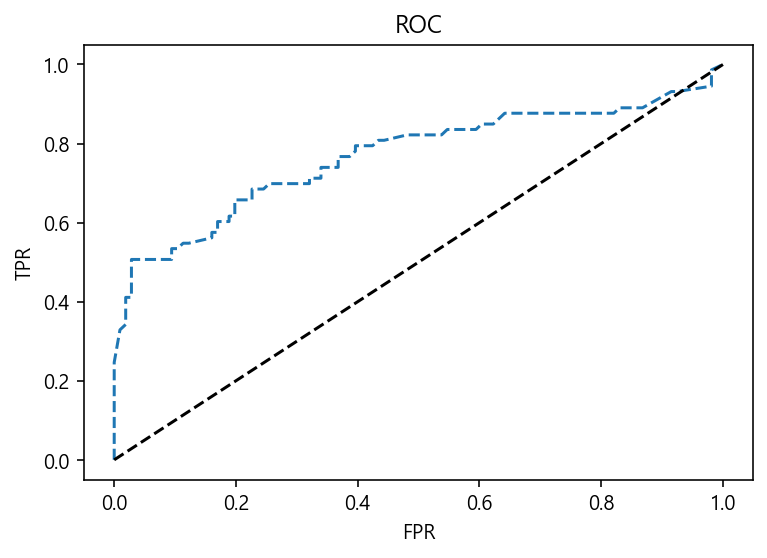

In [409]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve( y_test, gridcv.predict_proba(X_test)[:, 1] )

plt.plot(fpr, tpr, '--', label = 'xgboost')
plt.plot([0,1], [0,1], 'k--', label='random guess')
plt.plot([fpr],[tpr],'r-', ms=10)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

In [411]:
pred = grid_score.predict(X_test)

In [412]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

print('confusion_matrix:% s '%confusion_matrix(y_test,pred))
print('accuracy: %.3f' % accuracy_score(y_test, pred))
print('precision: %.3f' % precision_score(y_test, pred))
print('recall: %.3f' % recall_score(y_test, pred))
print('F1-score: %.3f' % f1_score(y_test, pred))
print('AUC: %.3f' % roc_auc_score(y_test, pred))

from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

confusion_matrix:[[81 25]
 [25 48]] 
accuracy: 0.721
precision: 0.658
recall: 0.658
F1-score: 0.658
AUC: 0.711
              precision    recall  f1-score   support

           0       0.76      0.76      0.76       106
           1       0.66      0.66      0.66        73

    accuracy                           0.72       179
   macro avg       0.71      0.71      0.71       179
weighted avg       0.72      0.72      0.72       179



In [414]:
feature_importance3=pd.Series(grid_score.feature_importances_,X_train.columns)

In [418]:
feature_importance3=feature_importance3.sort_values(ascending=False)

<AxesSubplot:>

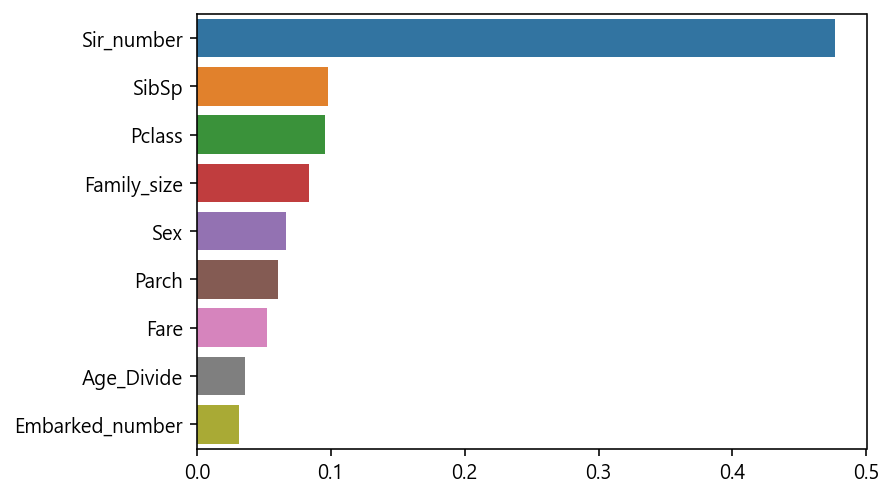

In [419]:
sns.barplot(x=feature_importance3,y=feature_importance3.index)

### SVM Classifier

In [429]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.preprocessing import PolynomialFeatures

In [423]:
svm_clf =Pipeline([
    ("scaler",StandardScaler()),
    ("SVC",SVC(C=0.1,max_iter=10,kernel='sigmoid'))
])
svm_clf.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('SVC', SVC(C=0.1, kernel='sigmoid', max_iter=10))])

In [424]:
pred=svm_clf.predict(X_test)

In [427]:
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)


In [441]:
polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler" ,StandardScaler()),
    ("svm_clf", LinearSVC(C=0.01, loss="hinge"))
])
polynomial_svm_clf.fit(X_train,y_train)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=0.01, loss='hinge'))])

In [442]:
pred=polynomial_svm_clf.predict(X_test)

In [443]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

print('confusion_matrix: %s '%confusion_matrix(y_test,pred))
print('accuracy: %.3f' % accuracy_score(y_test, pred))
print('precision: %.3f' % precision_score(y_true= y_test, y_pred=pred))
print('recall: %.3f' % recall_score(y_true= y_test, y_pred=pred))
print('F1-score: %.3f' % f1_score(y_true= y_test, y_pred=pred))
print('AUC: %.3f' % roc_auc_score(y_test, pred))

from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

confusion_matrix: [[89 17]
 [25 48]] 
accuracy: 0.765
precision: 0.738
recall: 0.658
F1-score: 0.696
AUC: 0.749
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       106
           1       0.74      0.66      0.70        73

    accuracy                           0.77       179
   macro avg       0.76      0.75      0.75       179
weighted avg       0.76      0.77      0.76       179



NameError: name 'plot_predictions' is not defined

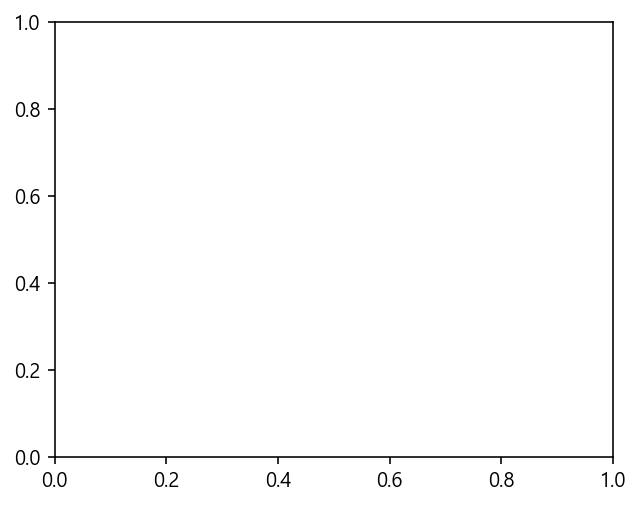

In [437]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(x, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)